In [1102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [1103]:
pd.set_option('display.max_columns', None)

df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1104]:
#let's check the shape of the data frame

df.shape

(9240, 37)

In [1105]:
#let's check the info() method and the datatype of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1106]:
#let's check the null values percentage

round(df.isnull().sum() * 100/ 9240,3)

Prospect ID                                       0.000
Lead Number                                       0.000
Lead Origin                                       0.000
Lead Source                                       0.390
Do Not Email                                      0.000
Do Not Call                                       0.000
Converted                                         0.000
TotalVisits                                       1.483
Total Time Spent on Website                       0.000
Page Views Per Visit                              1.483
Last Activity                                     1.115
Country                                          26.634
Specialization                                   15.563
How did you hear about X Education               23.885
What is your current occupation                  29.113
What matters most to you in choosing a course    29.318
Search                                            0.000
Magazine                                        

#### We clearly see that we have more than 30% of missing data in some of the columns

In [1107]:
#let's check the 'select' value in the columns, which can be considered as a null value.
cols = list(df.columns)
selectList = [round(len(df[df[i] == 'Select'][i])/9240,2) for i in cols]

[(cols[i], selectList[i])for i in range(0,len(selectList)-1) if (selectList[i] > 0)]

[('Specialization', 0.21),
 ('How did you hear about X Education', 0.55),
 ('Lead Profile', 0.45),
 ('City', 0.24)]

#### We can see four columns have values as Select

In [1108]:
df[~df['Asymmetrique Activity Index'].isnull()]['Asymmetrique Activity Index'].value_counts(normalize=True)

02.Medium    0.764436
01.High      0.163481
03.Low       0.072083
Name: Asymmetrique Activity Index, dtype: float64

In [1109]:
df['Asymmetrique Activity Index'].value_counts(normalize=True)

02.Medium    0.764436
01.High      0.163481
03.Low       0.072083
Name: Asymmetrique Activity Index, dtype: float64

In [1110]:
df['Asymmetrique Activity Index'].describe()

count          5022
unique            3
top       02.Medium
freq           3839
Name: Asymmetrique Activity Index, dtype: object

In [1111]:
[i[3:] for i in df['Asymmetrique Activity Index'].unique() if type(i)== str]

['Medium', 'High', 'Low']

In [1112]:
df['Asymmetrique Profile Index'].unique()

array(['02.Medium', '01.High', '03.Low', nan], dtype=object)

In [1113]:
 df['Asymmetrique Activity Index'] = df['Asymmetrique Activity Index'].apply(lambda x : x[3:] if type(x) == str else x)

In [1114]:
 df['Asymmetrique Profile Index'] = df['Asymmetrique Profile Index'].apply(lambda x : x[3:] if type(x) == str else x)

In [1115]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,Medium,Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,Medium,Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,Medium,High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,Medium,High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,Medium,High,15.0,18.0,No,No,Modified


<AxesSubplot:>

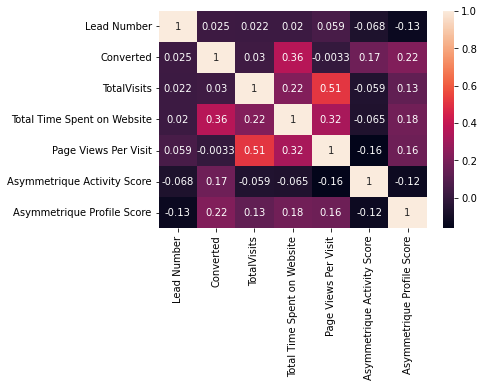

In [1116]:
sns.heatmap(df.corr(), annot=True)

In [1117]:
df['Asymmetrique Profile Index'].value_counts(normalize=True)

Medium    0.555157
High      0.438670
Low       0.006173
Name: Asymmetrique Profile Index, dtype: float64

In [1118]:
df['Asymmetrique Profile Index'].map({'Low':0, 'Medium':1, 'High':2}).median()

1.0

In [1119]:
df['Asymmetrique Activity Index'].value_counts(normalize=True)

Medium    0.764436
High      0.163481
Low       0.072083
Name: Asymmetrique Activity Index, dtype: float64

In [1120]:
df['Asymmetrique Activity Index'].map({'Low':0, 'Medium':1, 'High':2}).median()

1.0

In [1121]:
df['Asymmetrique Activity Score'].median()

14.0

In [1122]:
df['Asymmetrique Activity Score'].value_counts(normalize=True)

14.0    0.352648
15.0    0.257467
13.0    0.154321
16.0    0.092991
17.0    0.069494
12.0    0.039028
11.0    0.018917
10.0    0.011350
9.0     0.001792
18.0    0.000996
8.0     0.000796
7.0     0.000199
Name: Asymmetrique Activity Score, dtype: float64

In [1123]:
df['Asymmetrique Profile Score'].median()

16.0

In [1124]:
df['Asymmetrique Profile Score'].value_counts(normalize=True)

15.0    0.350259
18.0    0.213262
16.0    0.119275
17.0    0.115293
20.0    0.061330
19.0    0.048785
14.0    0.045002
13.0    0.040621
12.0    0.004381
11.0    0.001792
Name: Asymmetrique Profile Score, dtype: float64

##### Asymetrique Activity Score and Asymetrique Profile Score continues values are binned into 3 categories, which are low, medium, and high. These values are stored inside the Asymetrique Acitvity Index and Asymetrique Profile Index, hence we can take the median values and replace them with the null values 

In [1125]:
# Asymetrique Activity Index is important in the model even though it has very High missing 
# values we can't drop this, hence we shall fill the values with the Medium

df['Asymmetrique Activity Index'].fillna(value="Medium", inplace=True)
df['Asymmetrique Profile Index'].fillna(value="Medium", inplace=True)
df['Asymmetrique Activity Score'].fillna(value=14.0, inplace=True)
df['Asymmetrique Profile Score'].fillna(value=16.0, inplace=True)

In [1126]:
#Check the null value count again.

df[['Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 'Asymmetrique Activity Index']].isnull().sum()

Asymmetrique Profile Score     0
Asymmetrique Activity Score    0
Asymmetrique Profile Index     0
Asymmetrique Activity Index    0
dtype: int64

In [1127]:
df.City.unique()

array(['Select', 'Mumbai', nan, 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [1128]:
df.Country.unique()

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [1129]:
# we can drop City as 15% of the value is na and 24% is Select which is also a null type here, and there are not much unique value when compared to Country.

df.drop(labels='City', inplace=True, axis=1)

In [1130]:
df.shape

(9240, 36)

In [1131]:
df.Country.value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

In [1132]:
# 95% of the values are from India, hence we shall be replacing the null values with India

df.Country.fillna(value="India", inplace=True)

In [1133]:
df.Country.isnull().sum()

0

In [1134]:
df['Lead Profile'].unique()

array(['Select', 'Potential Lead', nan, 'Other Leads', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

In [1135]:
# almost 75% of the data is null (NaN and Select), hence we can drop this

df.drop(labels='Lead Profile', axis=1, inplace=True)

In [1136]:
df.shape

(9240, 35)

In [1137]:
df['Lead Quality'].unique()

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

In [1138]:
df['Lead Quality'].value_counts(normalize=True)

Might be             0.348759
Not Sure             0.244131
High in Relevance    0.142410
Worst                0.134362
Low in Relevance     0.130338
Name: Lead Quality, dtype: float64

In [1139]:
# we can drop Lead Quality as it's 51% of the data is missing

df.drop(labels="Lead Quality", axis=1, inplace=True)

In [1140]:
df.shape

(9240, 34)

In [1141]:
df.Tags.unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [1142]:
df.Tags.value_counts(normalize=True)

Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in touch

In [1143]:
# 35% of the tags are marked as 'Will revert after reading the email', hence we shall be marking this tag for missing data

df.Tags.fillna(value='Will revert after reading the email', inplace=True)

In [1144]:
df.Tags.isnull().sum()

0

In [1145]:
df['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [1146]:
df['Lead Source'].value_counts(normalize=True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64

In [1147]:
df['Lead Source'].mode()

0    Google
Name: Lead Source, dtype: object

In [1148]:
# we can replace the missing values with Google for Lead source

df['Lead Source'].fillna(value='Google', inplace=True)

In [1149]:
df['Lead Source'].isnull().sum()

0

In [1150]:
df['TotalVisits'].median()

3.0

In [1151]:
df.TotalVisits.fillna(value=3.0, inplace=True)

In [1152]:
df['Page Views Per Visit'].median()

2.0

In [1153]:
df['Page Views Per Visit'].fillna(value=2.0, inplace=True)

In [1154]:
df['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked', nan,
       'Approached upfront', 'SMS Sent', 'Visited Booth in Tradeshow',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [1155]:
df['Last Activity'].mode()

0    Email Opened
Name: Last Activity, dtype: object

In [1156]:
df['Last Activity'].value_counts(normalize=True)

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64

In [1157]:
df['Last Activity'].fillna(value='Email Opened', inplace=True)

In [1158]:
df.Specialization.unique()

array(['Select', 'Business Administration', 'Media and Advertising', nan,
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [1159]:
df.Specialization.mode()

0    Select
Name: Specialization, dtype: object

In [1160]:
# 21 % of the values are Select, which is a type of null value
df.Specialization.value_counts(normalize=True)

Select                               0.248911
Finance Management                   0.125096
Human Resource Management            0.108690
Marketing Management                 0.107408
Operations Management                0.064471
Business Administration              0.051653
IT Projects Management               0.046911
Supply Chain Management              0.044732
Banking, Investment And Insurance    0.043322
Travel and Tourism                   0.026019
Media and Advertising                0.026019
International Business               0.022815
Healthcare Management                0.020379
Hospitality Management               0.014612
E-COMMERCE                           0.014355
Retail Management                    0.012817
Rural and Agribusiness               0.009357
E-Business                           0.007306
Services Excellence                  0.005127
Name: Specialization, dtype: float64

In [1161]:
# there is not dominant specialization to replace it with and there is almost 36% of the values are null,
# we have to drop this.

df.drop(labels='Specialization', axis=1, inplace=True)

In [1162]:
df.shape

(9240, 33)

In [1163]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1164]:
df['How did you hear about X Education'].value_counts(normalize=True)

Select                   0.717048
Online Search            0.114887
Word Of Mouth            0.049481
Student of SomeSchool    0.044078
Other                    0.026447
Multiple Sources         0.021612
Advertisements           0.009953
Social Media             0.009527
Email                    0.003697
SMS                      0.003270
Name: How did you hear about X Education, dtype: float64

In [1165]:
# more than 70% of the values are missing, lets drop this columns

df.drop(labels='How did you hear about X Education', axis=1, inplace=True)

In [1166]:
df['What is your current occupation'].unique()

array(['Unemployed', 'Student', nan, 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

In [1167]:
df['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [1168]:
df['What is your current occupation'].fillna(value='Unemployed', inplace=True)

In [1169]:
df['What matters most to you in choosing a course'].unique()

array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

In [1170]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [1171]:
df['What matters most to you in choosing a course'].fillna(value='Better Career Prospects', inplace=True)

In [1172]:
df.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

In [1173]:
df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                                          object
Newspaper Article                                 object
X Education Forums             

In [1174]:
cols = [i for i in cols if i not in ['Specialization', 'How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'City']]
#zip(cols, df[cols].unique())

In [1175]:
[(i, df[i].unique(), type(df[i])) for i in cols]

def getColDetails ():
    unique_cols = [df[i].unique() for i in df.columns]
    length = [df[i].unique().size for i in df.columns]
    dataType = [df[i].dtype for i in df.columns]
    u_df = pd.DataFrame({"cols":df.columns, "unique":unique_cols, "dataType": dataType,"length": length})
    return u_df
u_df = getColDetails()
u_df

,cols,unique,dataType,length
0,Prospect ID,"[7927b2df-8bba-4d29-b9a2-b6e0beafe620, 2a27243...",object,9240
1,Lead Number,"[660737, 660728, 660727, 660719, 660681, 66068...",int64,9240
2,Lead Origin,"[API, Landing Page Submission, Lead Add Form, ...",object,5
3,Lead Source,"[Olark Chat, Organic Search, Direct Traffic, G...",object,21
4,Do Not Email,"[No, Yes]",object,2
5,Do Not Call,"[No, Yes]",object,2
6,Converted,"[0, 1]",int64,2
7,TotalVisits,"[0.0, 5.0, 2.0, 1.0, 4.0, 8.0, 11.0, 6.0, 3.0,...",float64,41
8,Total Time Spent on Website,"[0, 674, 1532, 305, 1428, 1640, 71, 58, 1351, ...",int64,1731
9,Page Views Per Visit,"[0.0, 2.5, 2.0, 1.0, 4.0, 8.0, 2.67, 11.0, 5.0...",float64,114


#### all the data types are proper

In [1176]:
# we don't need Prospect ID, Lead Number as they are unique identification nubmers. 
# And Magazine, Receive More Updates About Our Courses, Update me on Supply Chain Content
# Get updates on DM Content, I agree to pay the amount through cheque all these have single value NO and these will be 
# No useful for us

df.drop(labels=['Prospect ID', 'Lead Number', 'Magazine', 'Receive More Updates About Our Courses',
               'Update me on Supply Chain Content', 'Get updates on DM Content',
                'I agree to pay the amount through cheque'], axis=1, inplace=True)

df.shape

(9240, 25)

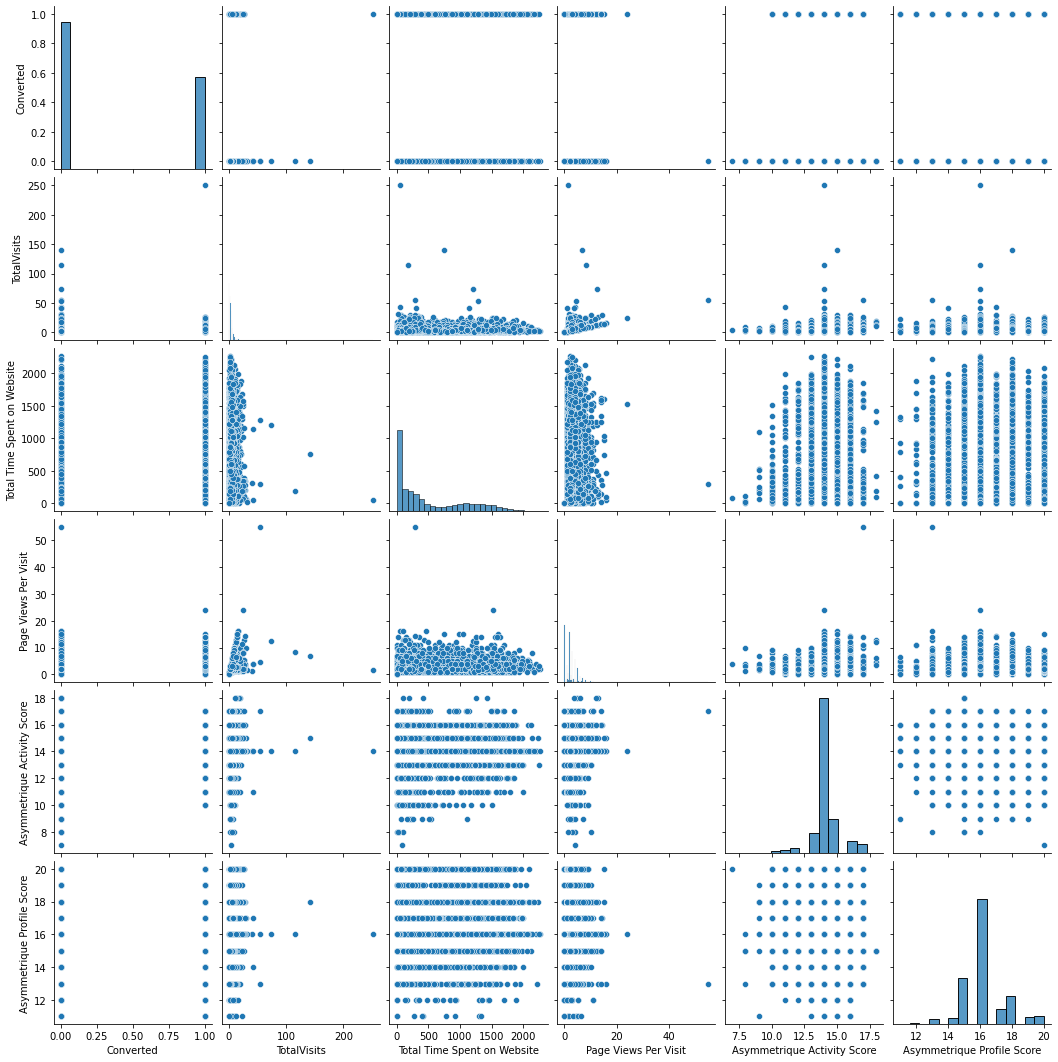

In [1177]:
sns.pairplot(data=df)
plt.show()

In [1178]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1179]:
# Asymmetrique Activity Score, Asymmetrique Profile Score we do not need these coloumns 
# because we are already categorized into 3 bins under Asymetrique Activity Index, Asymmetrique Profile Index

df.drop(labels=['Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1, inplace=True)

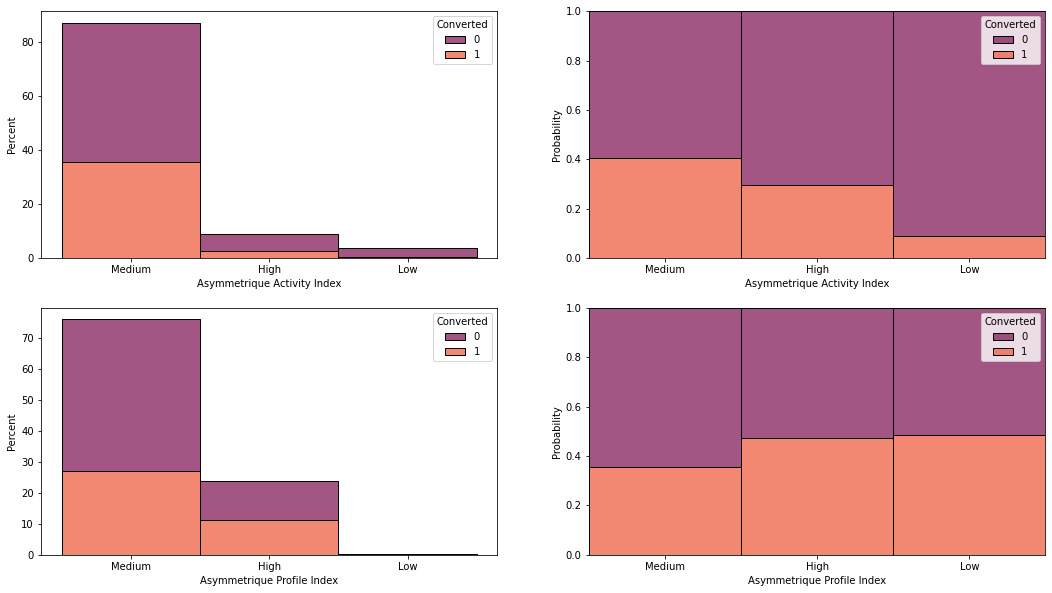

In [1180]:
plt.figure(figsize=[18,10])
plt.subplot(2,2,1)
sns.histplot( data=df, x='Asymmetrique Activity Index', hue="Converted",multiple='stack', element='bars',
             palette="rocket", stat='percent')

plt.subplot(2,2,2)
sns.histplot( data=df, x='Asymmetrique Activity Index', hue="Converted",multiple='fill', element='bars',
             palette="rocket", stat='probability')

plt.subplot(2,2,3)
sns.histplot(data=df, x='Asymmetrique Profile Index', hue="Converted",multiple='stack', element='bars',
             palette="rocket", stat='percent')

plt.subplot(2,2,4)
sns.histplot(data=df, x='Asymmetrique Profile Index', hue="Converted",multiple='fill', element='bars',
             palette="rocket", stat='probability')
plt.show()

#### Inference

1. Activity Index
    - Medium has the highest count, almost 85% and out of those 40% converted.
    - High has 10% count and out of those 30% are converted.
    - Low count is very less, less than 5% and out of those 8-10% converted
    
    
2. Profile Index
    - Again Medium has the highest count around 78%, and out of those only 35-38% converted.
    - High has the count of around 20%, and out of those 40-42% converted.
    - Low count is very less,less than 3% and out of thoes 42% converted.
    

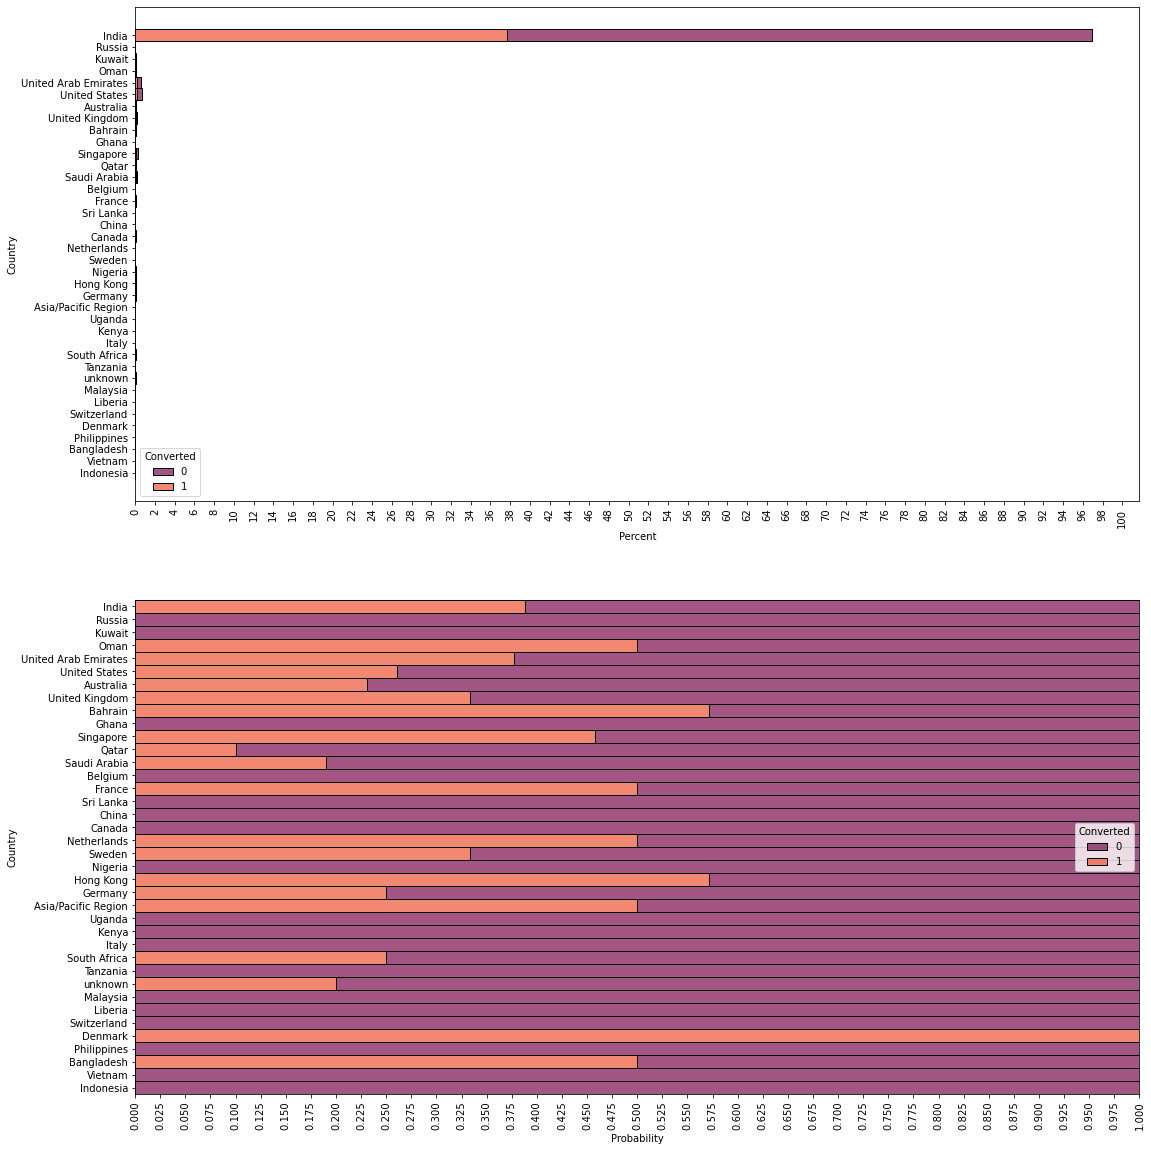

In [1181]:
plt.figure(figsize=[18,20])
plt.subplot(2,1,1)
sns.histplot( data=df, y='Country', hue="Converted",multiple='stack', element='bars',
             palette="rocket", stat='percent')
plt.xticks(range(0,101,2), rotation=90)

plt.subplot(2,1,2)
sns.histplot( data=df, y='Country', hue="Converted",multiple='fill', element='bars',
             palette="rocket", stat='probability')
plt.xticks(np.arange(0.0,1.025,0.025), rotation=90)

plt.show()

#### Inference

- 96% percent of the Leads are from the India.
- only 37.5% of the Leads from India are converted.

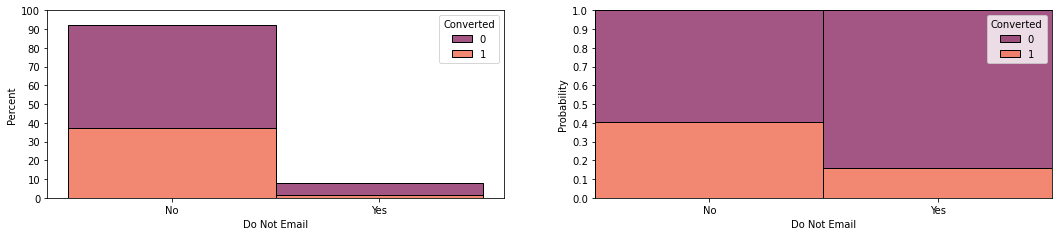

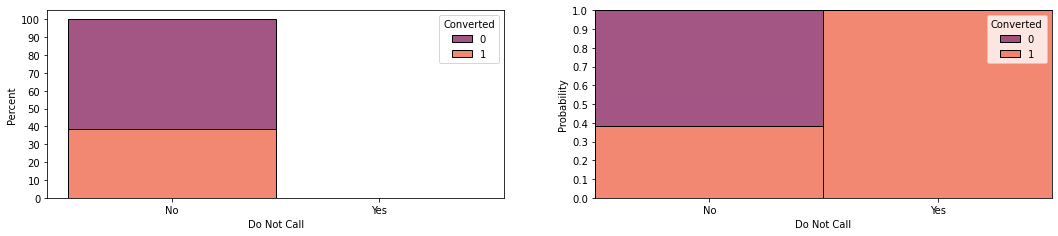

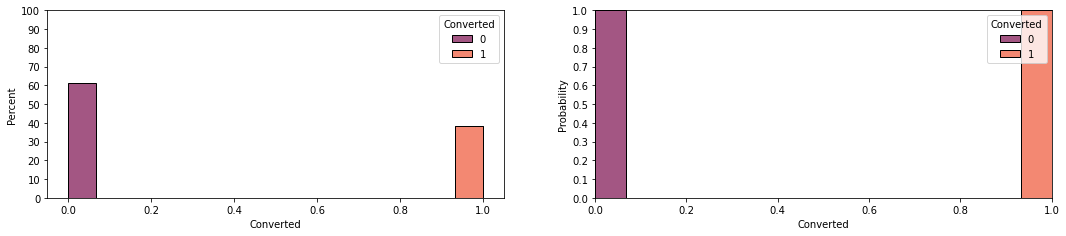

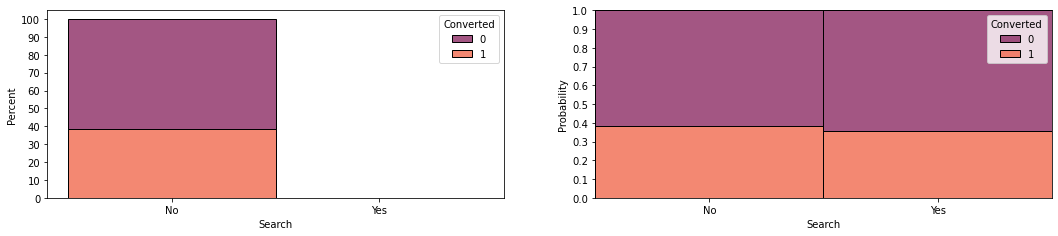

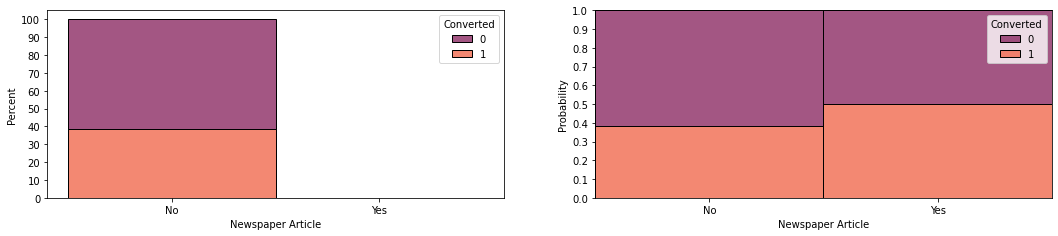

In [1182]:
u_df = getColDetails()
yesOrNoCols = list(u_df[u_df.length == 2].cols)


def percentageAndProbability(array, figSize, y=None, col=2):
    for i in range(0, len(array)):
        plt.figure(figsize=figSize)
        plt.subplot(len(array) if col == 2 else len(array)*2, col, (2*i)+1)
        sns.histplot( data=df, x=array[i] if y is None else None, y= None if y is None else array[i], hue="Converted",multiple='stack', element='bars',
                 palette="rocket", stat='percent')
        plt.yticks(range(0,101,10)) if y is None else plt.xticks(np.arange(0,100.25,2.5), rotation=90)

        plt.subplot(len(array) if col == 2 else len(array)*2 , col, (2*i)+2)
        sns.histplot( data=df, x=array[i] if y is None else None, y= None if y is None else array[i], hue="Converted",multiple='fill', element='bars',
                 palette="rocket", stat='probability')
        plt.yticks(np.arange(0.0,1.1,0.1)) if y is None else plt.xticks(np.arange(0.0,1.025,0.025), rotation=90)
    plt.show()
    
percentageAndProbability(yesOrNoCols[:5], [18,20])

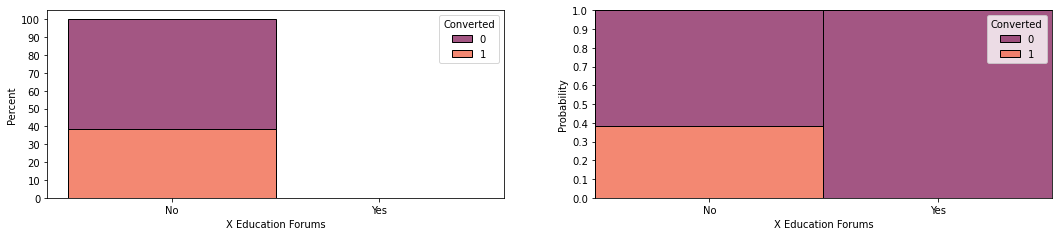

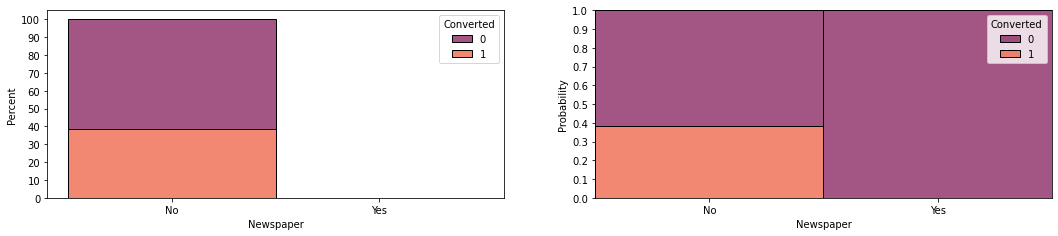

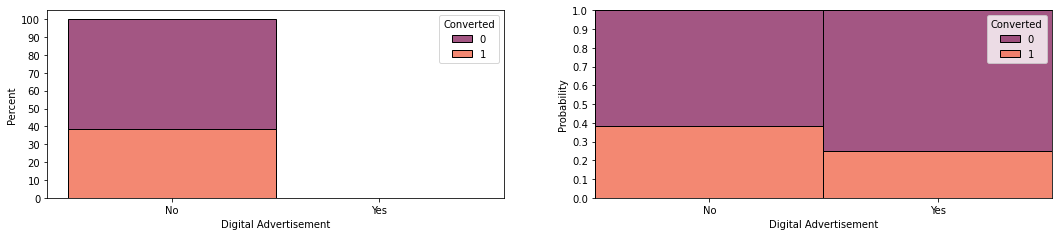

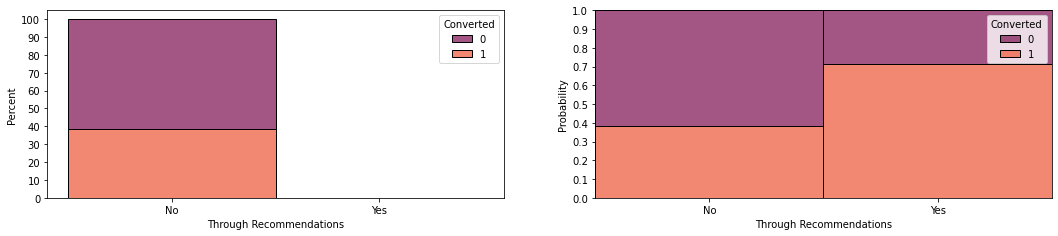

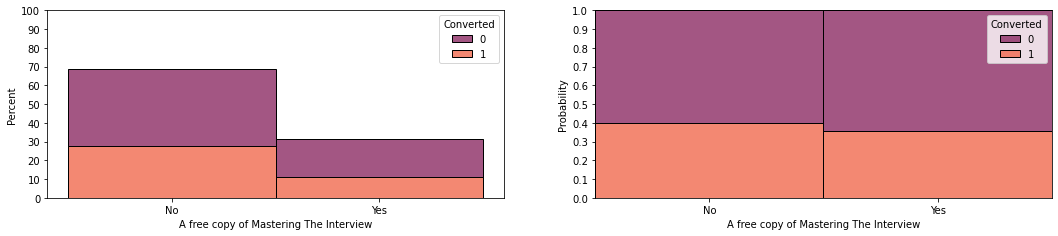

In [1183]:
percentageAndProbability(yesOrNoCols[5:], [18,20])

In [1184]:
restOfCatCols = list(u_df[(u_df.length > 2) & (u_df.length < 27)].cols)

In [1185]:
restOfCatCols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Last Notable Activity']

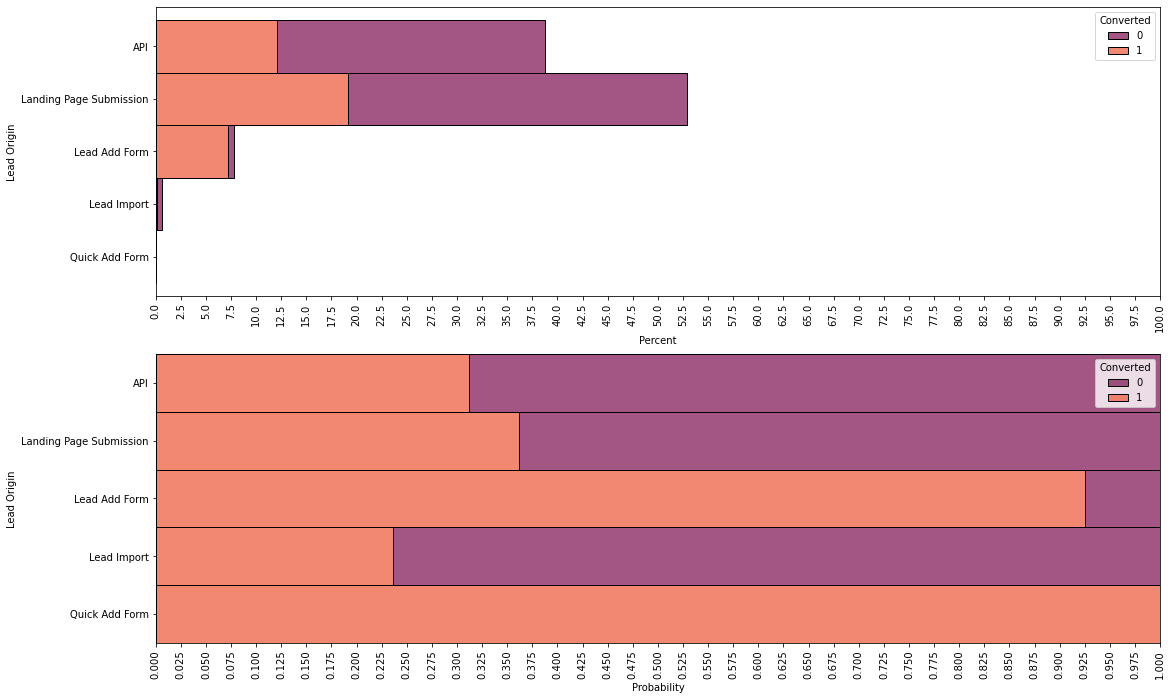

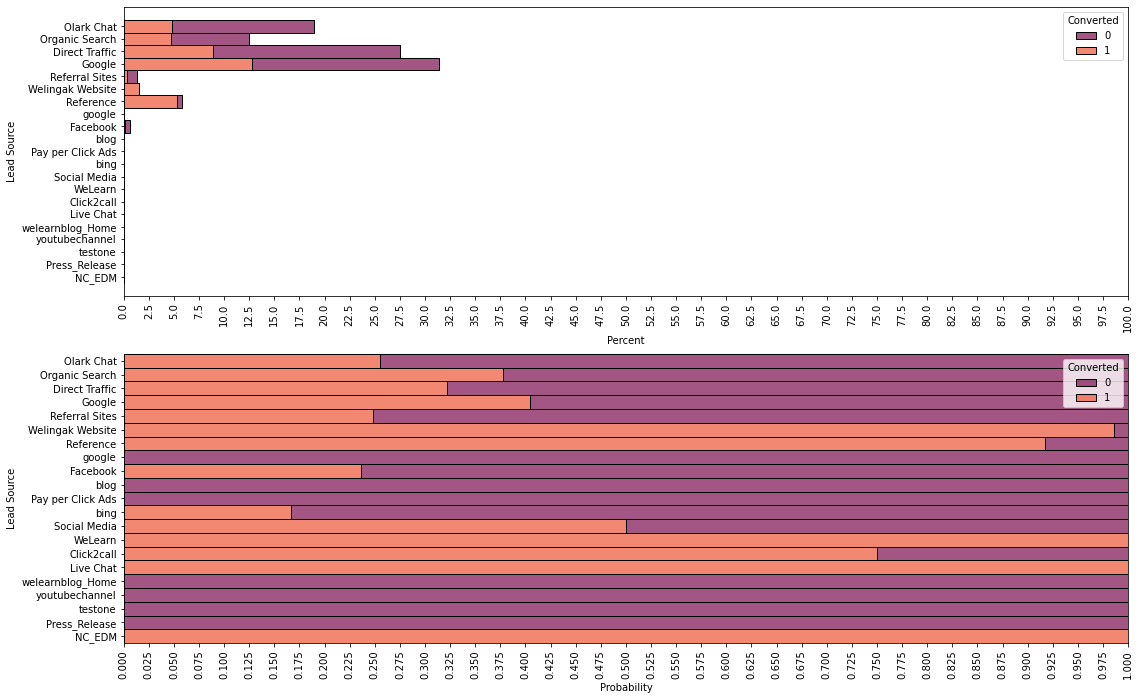

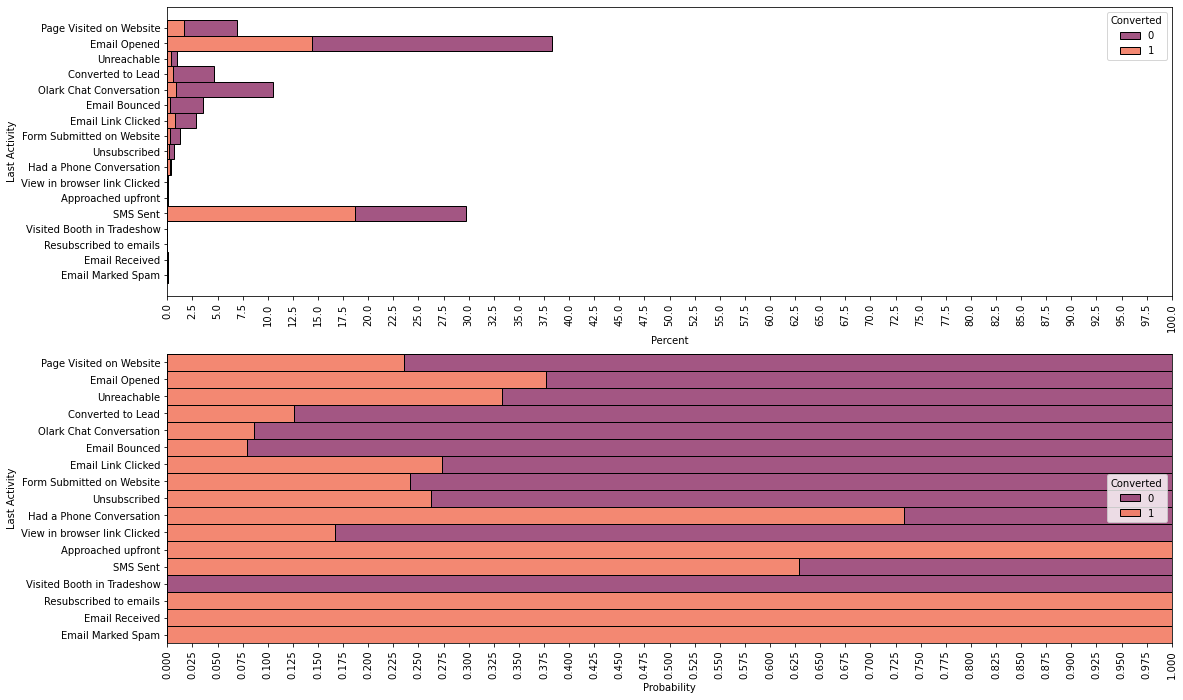

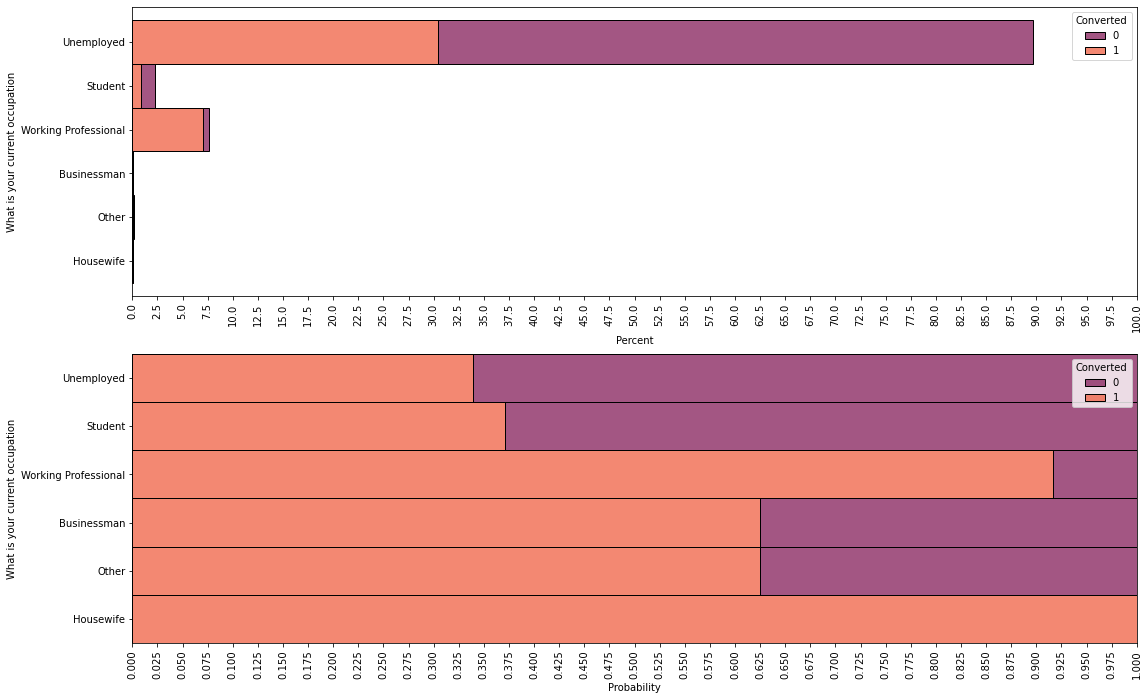

In [1186]:
percentageAndProbability(restOfCatCols[:4], [18,50], y='non none', col = 1)

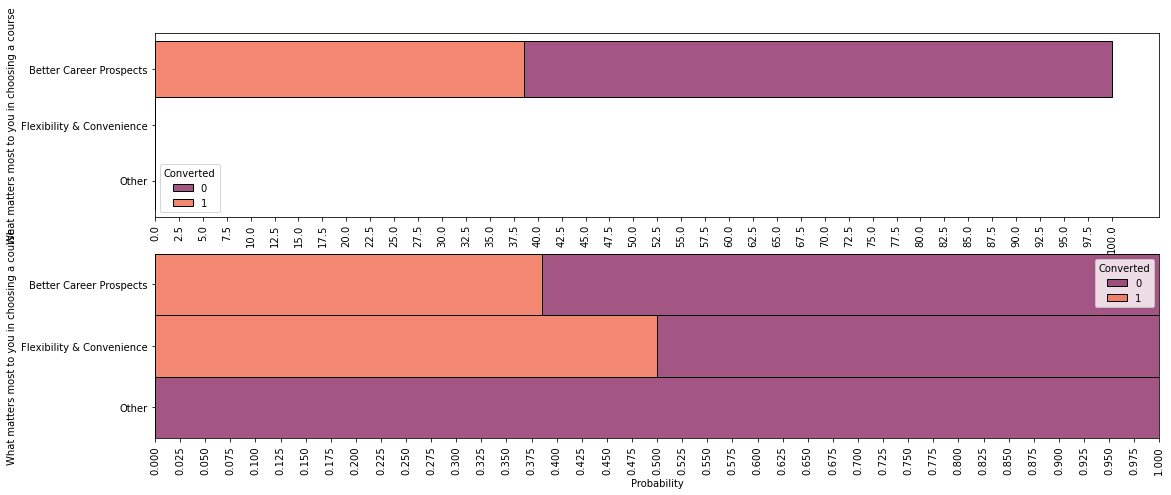

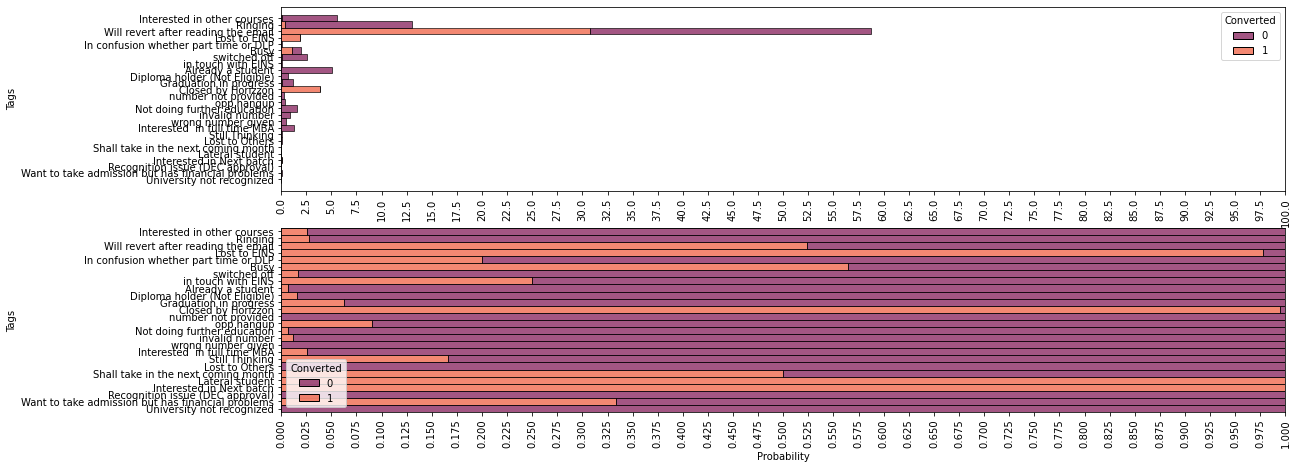

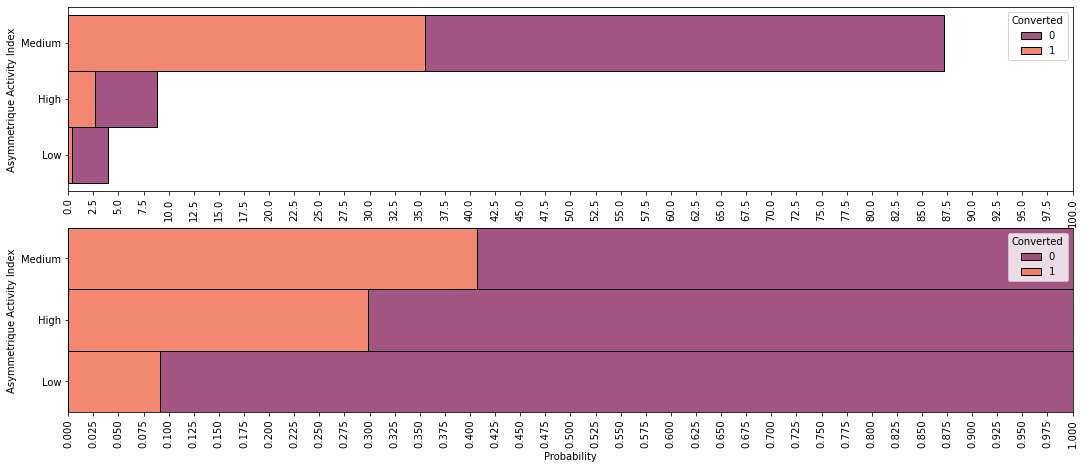

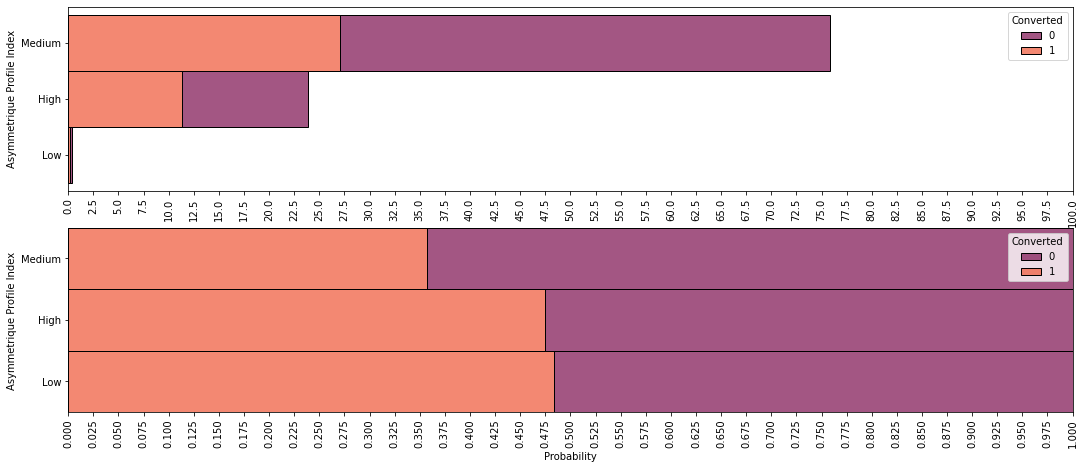

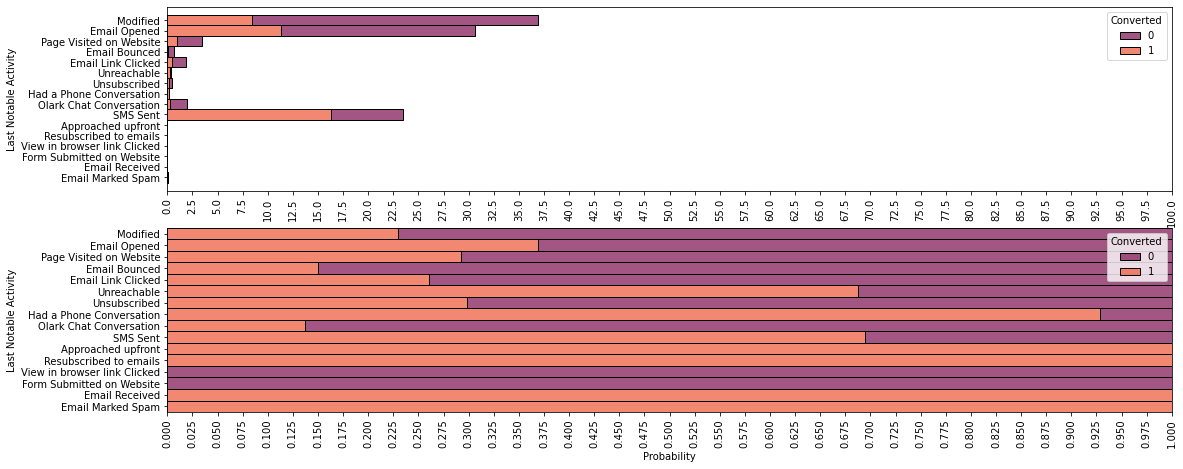

In [1187]:
percentageAndProbability(restOfCatCols[4:], [18,40], y='non none', col = 1)

In [1188]:
u_df

,cols,unique,dataType,length
0,Lead Origin,"[API, Landing Page Submission, Lead Add Form, ...",object,5
1,Lead Source,"[Olark Chat, Organic Search, Direct Traffic, G...",object,21
2,Do Not Email,"[No, Yes]",object,2
3,Do Not Call,"[No, Yes]",object,2
4,Converted,"[0, 1]",int64,2
5,TotalVisits,"[0.0, 5.0, 2.0, 1.0, 4.0, 8.0, 11.0, 6.0, 3.0,...",float64,41
6,Total Time Spent on Website,"[0, 674, 1532, 305, 1428, 1640, 71, 58, 1351, ...",int64,1731
7,Page Views Per Visit,"[0.0, 2.5, 2.0, 1.0, 4.0, 8.0, 2.67, 11.0, 5.0...",float64,114
8,Last Activity,"[Page Visited on Website, Email Opened, Unreac...",object,17
9,Country,"[India, Russia, Kuwait, Oman, United Arab Emir...",object,38


#### Let's create dummy variables for categorical variables

In [1189]:
cols = list(df.columns)

for i in ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted']:
    cols.remove(i)

dummies = pd.get_dummies(df[cols], drop_first=True)
dummies


,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Asymmetrique Activity Index_Low,Asymmetrique Activity Index_Medium,Asymmetrique Profile Index_Low,Asymmetrique Profile Index_Medium,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,

In [1190]:
df = pd.concat([df, dummies], axis=1)
df.drop(labels=cols, axis=1, inplace=True)
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Asymmetrique Activity Index_Low,Asymmetrique Activity Index_Medium,Asymmetrique Profile Index_Low,Asymmetrique Profile Index_Medium,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1

In [1191]:
df.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook',
       ...
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=141)

In [1192]:
# before spliting the test train data, lets check the data distribution of Converted

df.Converted.value_counts(normalize=True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

#### distribution is 60-40, its a good distribution to work on.

### Let's split the data into test and train data set

In [1193]:
x = df.drop(labels='Converted', axis=1)
x.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Asymmetrique Activity Index_Low,Asymmetrique Activity Index_Medium,Asymmetrique Profile Index_Low,Asymmetrique Profile Index_Medium,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0

In [1194]:
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1195]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

In [1196]:
x_train.shape

(6468, 140)

In [1197]:
y_train.shape

(6468,)

In [1198]:
x_test.shape

(2772, 140)

In [1199]:
y_test.shape

(2772,)

#### TotalVisits, Total Time Spent on Website, Page Views Per Visit = have continues value and we can do min max scaling to these

In [1200]:
from sklearn.preprocessing import MinMaxScaler

In [1201]:
scaler = MinMaxScaler()

In [1202]:
minMax_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

x_train[minMax_cols] = scaler.fit_transform(x_train[minMax_cols])

In [1203]:
x_train[minMax_cols].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6468.000000,6468.000000,6468.000000
mean,0.013815,0.212974,0.042686
std,0.021048,0.240566,0.039326
min,0.000000,0.000000,0.000000
25%,0.003984,0.005282,0.018182
50%,0.011952,0.108275,0.036364
75%,0.019920,0.407790,0.054545
max,1.000000,1.000000,1.000000


### Create a model Using RFE

In [1204]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, step=15)
rfe = rfe.fit(x_train, y_train)

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

In [1205]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Origin_Quick Add Form', True, 1),
 ('Lead Source_Direct Traffic', False, 2),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Live Chat', False, 5),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Pay per Click Ads', False, 6),
 ('Lead Source_Press_Release', False, 3),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', False, 4),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_WeLearn', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 5),
 ('Lead Source_blog', True, 1),
 ('Lead Source_google', True, 1),
 ('Lead Source_testone', False, 6),
 ('Lead Source_welearnblog_H

In [1206]:
rfe_cols = x_train.columns[rfe.support_]

In [1207]:
rfe_cols

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Quick Add Form', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_blog', 'Lead Source_google', 'Do Not Email_Yes',
       'Do Not Call_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Country_Australia', 'Country_Belgium',
       'Country_Canada', 'Country_Germany', 'Country_Ghana',
       'Country_Hong Kong', 'Country_Qatar', 'Country_Saudi Arabia',
       'Country_South Africa', 'Country_United Kingdom',
       'Country_United States', 'Country_unknown',
       'What is your current occupation_Hou

In [1208]:
rfe_cols.shape

(70,)

In [1209]:
x_train_sm = sm.add_constant(x_train[rfe_cols])
log_mod1 = sm.GLS(y_train, x_train_sm, family = sm.families.Binomial())
res = log_mod1.fit()
res.summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.592
Model:                            GLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     132.7
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:40   Log-Likelihood:                -1606.0
No. Observations:                6468   AIC:                             3354.
Df Residuals:                    6397   BIC:                             3835.
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.1916      0.031      6.106      0.000       0.130       0.253
TotalVisits                                                                 0.6978      0.206      3.390      0.001       0.294       1.101
Total Time Spent on Website                                                 0.5217      0.019     27.716      0.000       0.485       0.559
Lead Origin_Landing Page Submission                                        -0.0473      0.011     -4.295      0.000      -0.069      -0.026
Lead Origin_Lead Add Form                                                   0.2747      0.020     13.508      0.000       0.235       0.315
Lead Origin_Quick Add Form                                                  0.4018      0.313      1.283      0.200      -0.212       1.016
Lead Source_NC_EDM                                                          0.4800      0.312      1.538      0.124      -0.132       1.092
Lead Source_Olark Chat                                                      0.0371      0.014      2.616      0.009       0.009       0.065
Lead Source_Social Media                                                    0.3527      0.221      1.596      0.111      -0.081       0.786
Lead Source_WeLearn                                                         0.4358      0.312      1.396      0.163      -0.176       1.048
Lead Source_Welingak Website                                                0.1935      0.037      5.271      0.000       0.122       0.265
Lead Source_blog                                                           -0.4533      0.312     -1.453      0.146      -1.065       0.158
Lead Source_google                                                         -0.2568      0.140     -1.830      0.067      -0.532       0.018
Do Not Email_Yes                                                           -0.0995      0.021     -4.842      0.000      -0.140      -0.059
Do Not Call_Yes                                                             0.3213      0.221      1.454      0.146      -0.112       0.755
Last Activity_Converted to Lead                                            -0.0271      0.022     -1.210      0.226      -0.071       0.017
Last Activity_Email Bounced                                                -0.0301      0.032     -0.941      0.347      -0.093       0.033
Last Activity_Had a Phone Conversation                                      0.0505      0.095      0.530      0.596      -0.136       0.237
Last Activity_Olark Chat Conversation                                      -0.1012      0.019     -5.247      0.000      -0.139      -0.063
Las

In [1210]:
cols = rfe_cols.drop('Tags_Interested  in full time MBA', 1)

In [1211]:
x_train_sm = sm.add_constant(x_train[cols])
log_mod2 = sm.GLS(y_train, x_train_sm, family = sm.families.Binomial())
res = log_mod2.fit()
res.summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.592
Model:                            GLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     134.6
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:40   Log-Likelihood:                -1606.0
No. Observations:                6468   AIC:                             3352.
Df Residuals:                    6398   BIC:                             3826.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.1920      0.031      6.201      0.000       0.131       0.253
TotalVisits                                                                 0.6980      0.206      3.391      0.001       0.294       1.101
Total Time Spent on Website                                                 0.5217      0.019     27.718      0.000       0.485       0.559
Lead Origin_Landing Page Submission                                        -0.0473      0.011     -4.299      0.000      -0.069      -0.026
Lead Origin_Lead Add Form                                                   0.2747      0.020     13.509      0.000       0.235       0.315
Lead Origin_Quick Add Form                                                  0.4018      0.313      1.283      0.199      -0.212       1.016
Lead Source_NC_EDM                                                          0.4800      0.312      1.538      0.124      -0.132       1.092
Lead Source_Olark Chat                                                      0.0371      0.014      2.615      0.009       0.009       0.065
Lead Source_Social Media                                                    0.3527      0.221      1.596      0.111      -0.081       0.786
Lead Source_WeLearn                                                         0.4358      0.312      1.397      0.163      -0.176       1.048
Lead Source_Welingak Website                                                0.1935      0.037      5.271      0.000       0.122       0.265
Lead Source_blog                                                           -0.4533      0.312     -1.453      0.146      -1.065       0.158
Lead Source_google                                                         -0.2569      0.140     -1.831      0.067      -0.532       0.018
Do Not Email_Yes                                                           -0.0995      0.021     -4.847      0.000      -0.140      -0.059
Do Not Call_Yes                                                             0.3213      0.221      1.454      0.146      -0.112       0.755
Last Activity_Converted to Lead                                            -0.0271      0.022     -1.212      0.226      -0.071       0.017
Last Activity_Email Bounced                                                -0.0302      0.032     -0.944      0.345      -0.093       0.033
Last Activity_Had a Phone Conversation                                      0.0504      0.095      0.530      0.596      -0.136       0.237
Last Activity_Olark Chat Conversation                                      -0.1012      0.019     -5.252      0.000      -0.139      -0.063
Las

In [1212]:
cols = cols.drop('Tags_Diploma holder (Not Eligible)', 1)

In [1213]:
x_train_sm = sm.add_constant(x_train[cols])
log_mod3 = sm.GLS(y_train, x_train_sm, family = sm.families.Binomial())
res = log_mod3.fit()
res.summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.592
Model:                            GLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     136.6
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:40   Log-Likelihood:                -1606.0
No. Observations:                6468   AIC:                             3350.
Df Residuals:                    6399   BIC:                             3818.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.1925      0.031      6.233      0.000       0.132       0.253
TotalVisits                                                                 0.6982      0.206      3.392      0.001       0.295       1.102
Total Time Spent on Website                                                 0.5218      0.019     27.732      0.000       0.485       0.559
Lead Origin_Landing Page Submission                                        -0.0473      0.011     -4.298      0.000      -0.069      -0.026
Lead Origin_Lead Add Form                                                   0.2748      0.020     13.514      0.000       0.235       0.315
Lead Origin_Quick Add Form                                                  0.4019      0.313      1.284      0.199      -0.212       1.016
Lead Source_NC_EDM                                                          0.4800      0.312      1.538      0.124      -0.132       1.092
Lead Source_Olark Chat                                                      0.0371      0.014      2.618      0.009       0.009       0.065
Lead Source_Social Media                                                    0.3528      0.221      1.596      0.111      -0.081       0.786
Lead Source_WeLearn                                                         0.4358      0.312      1.397      0.163      -0.176       1.047
Lead Source_Welingak Website                                                0.1934      0.037      5.271      0.000       0.121       0.265
Lead Source_blog                                                           -0.4533      0.312     -1.453      0.146      -1.065       0.158
Lead Source_google                                                         -0.2570      0.140     -1.831      0.067      -0.532       0.018
Do Not Email_Yes                                                           -0.0996      0.021     -4.850      0.000      -0.140      -0.059
Do Not Call_Yes                                                             0.3213      0.221      1.454      0.146      -0.112       0.755
Last Activity_Converted to Lead                                            -0.0272      0.022     -1.216      0.224      -0.071       0.017
Last Activity_Email Bounced                                                -0.0303      0.032     -0.947      0.344      -0.093       0.032
Last Activity_Had a Phone Conversation                                      0.0504      0.095      0.530      0.596      -0.136       0.237
Last Activity_Olark Chat Conversation                                      -0.1013      0.019     -5.256      0.000      -0.139      -0.064
Las

In [1214]:
cols = cols.drop('Country_United States', 1)

In [1215]:
x_train_sm = sm.add_constant(x_train[cols])
log_mod4 = sm.GLS(y_train, x_train_sm, family = sm.families.Binomial())
res = log_mod4.fit()
res.summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.592
Model:                            GLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     138.7
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:40   Log-Likelihood:                -1606.1
No. Observations:                6468   AIC:                             3348.
Df Residuals:                    6400   BIC:                             3809.
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.1926      0.031      6.239      0.000       0.132       0.253
TotalVisits                                                                 0.6978      0.206      3.391      0.001       0.294       1.101
Total Time Spent on Website                                                 0.5217      0.019     27.731      0.000       0.485       0.559
Lead Origin_Landing Page Submission                                        -0.0473      0.011     -4.296      0.000      -0.069      -0.026
Lead Origin_Lead Add Form                                                   0.2745      0.020     13.508      0.000       0.235       0.314
Lead Origin_Quick Add Form                                                  0.4013      0.313      1.282      0.200      -0.212       1.015
Lead Source_NC_EDM                                                          0.4799      0.312      1.538      0.124      -0.132       1.092
Lead Source_Olark Chat                                                      0.0369      0.014      2.605      0.009       0.009       0.065
Lead Source_Social Media                                                    0.3525      0.221      1.595      0.111      -0.081       0.786
Lead Source_WeLearn                                                         0.4357      0.312      1.396      0.163      -0.176       1.047
Lead Source_Welingak Website                                                0.1935      0.037      5.272      0.000       0.122       0.265
Lead Source_blog                                                           -0.4534      0.312     -1.453      0.146      -1.065       0.158
Lead Source_google                                                         -0.2572      0.140     -1.833      0.067      -0.532       0.018
Do Not Email_Yes                                                           -0.0994      0.021     -4.840      0.000      -0.140      -0.059
Do Not Call_Yes                                                             0.3210      0.221      1.453      0.146      -0.112       0.754
Last Activity_Converted to Lead                                            -0.0274      0.022     -1.226      0.220      -0.071       0.016
Last Activity_Email Bounced                                                -0.0301      0.032     -0.940      0.347      -0.093       0.033
Last Activity_Had a Phone Conversation                                      0.0502      0.095      0.527      0.598      -0.136       0.237
Last Activity_Olark Chat Conversation                                      -0.1012      0.019     -5.250      0.000      -0.139      -0.063
Las

In [1216]:
cols = cols.drop('Last Activity_Had a Phone Conversation', 1)

In [1217]:
def getLog ():
    x_train_sm = sm.add_constant(x_train[cols])
    log_mod4 = sm.GLS(y_train, x_train_sm, family = sm.families.Binomial())
    return log_mod4.fit()

getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.592
Model:                            GLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     140.8
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:41   Log-Likelihood:                -1606.3
No. Observations:                6468   AIC:                             3347.
Df Residuals:                    6401   BIC:                             3800.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.1926      0.031      6.238      0.000       0.132       0.253
TotalVisits                                                                 0.6972      0.206      3.388      0.001       0.294       1.101
Total Time Spent on Website                                                 0.5218      0.019     27.735      0.000       0.485       0.559
Lead Origin_Landing Page Submission                                        -0.0473      0.011     -4.300      0.000      -0.069      -0.026
Lead Origin_Lead Add Form                                                   0.2746      0.020     13.514      0.000       0.235       0.314
Lead Origin_Quick Add Form                                                  0.4012      0.313      1.282      0.200      -0.212       1.015
Lead Source_NC_EDM                                                          0.4799      0.312      1.538      0.124      -0.132       1.092
Lead Source_Olark Chat                                                      0.0369      0.014      2.600      0.009       0.009       0.065
Lead Source_Social Media                                                    0.3525      0.221      1.595      0.111      -0.081       0.786
Lead Source_WeLearn                                                         0.4357      0.312      1.397      0.163      -0.176       1.047
Lead Source_Welingak Website                                                0.1932      0.037      5.266      0.000       0.121       0.265
Lead Source_blog                                                           -0.4534      0.312     -1.453      0.146      -1.065       0.158
Lead Source_google                                                         -0.2573      0.140     -1.834      0.067      -0.532       0.018
Do Not Email_Yes                                                           -0.0991      0.021     -4.831      0.000      -0.139      -0.059
Do Not Call_Yes                                                             0.3203      0.221      1.450      0.147      -0.113       0.754
Last Activity_Converted to Lead                                            -0.0281      0.022     -1.260      0.208      -0.072       0.016
Last Activity_Email Bounced                                                -0.0310      0.032     -0.971      0.332      -0.094       0.032
Last Activity_Olark Chat Conversation                                      -0.1018      0.019     -5.296      0.000      -0.140      -0.064
Last Activity_Page Visited on Website                                      -0.0253      0.024     -1.043      0.297      -0.073       0.022
Las

In [1218]:
cols = cols.drop('Tags_Lost to Others', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.592
Model:                            GLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     143.0
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:41   Log-Likelihood:                -1606.3
No. Observations:                6468   AIC:                             3345.
Df Residuals:                    6402   BIC:                             3792.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.1925      0.031      6.236      0.000       0.132       0.253
TotalVisits                                                                 0.6968      0.206      3.387      0.001       0.293       1.100
Total Time Spent on Website                                                 0.5218      0.019     27.737      0.000       0.485       0.559
Lead Origin_Landing Page Submission                                        -0.0473      0.011     -4.301      0.000      -0.069      -0.026
Lead Origin_Lead Add Form                                                   0.2745      0.020     13.513      0.000       0.235       0.314
Lead Origin_Quick Add Form                                                  0.4013      0.313      1.282      0.200      -0.212       1.015
Lead Source_NC_EDM                                                          0.4799      0.312      1.538      0.124      -0.132       1.091
Lead Source_Olark Chat                                                      0.0368      0.014      2.595      0.009       0.009       0.065
Lead Source_Social Media                                                    0.3524      0.221      1.595      0.111      -0.081       0.786
Lead Source_WeLearn                                                         0.4357      0.312      1.397      0.163      -0.176       1.047
Lead Source_Welingak Website                                                0.1933      0.037      5.268      0.000       0.121       0.265
Lead Source_blog                                                           -0.4534      0.312     -1.454      0.146      -1.065       0.158
Lead Source_google                                                         -0.2572      0.140     -1.834      0.067      -0.532       0.018
Do Not Email_Yes                                                           -0.0991      0.021     -4.829      0.000      -0.139      -0.059
Do Not Call_Yes                                                             0.3203      0.221      1.450      0.147      -0.113       0.753
Last Activity_Converted to Lead                                            -0.0281      0.022     -1.260      0.208      -0.072       0.016
Last Activity_Email Bounced                                                -0.0311      0.032     -0.975      0.330      -0.094       0.031
Last Activity_Olark Chat Conversation                                      -0.1017      0.019     -5.292      0.000      -0.139      -0.064
Last Activity_Page Visited on Website                                      -0.0252      0.024     -1.040      0.298      -0.073       0.022
Las

In [1219]:
cols = cols.drop('Country_Ghana', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.592
Model:                            GLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     145.2
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:41   Log-Likelihood:                -1606.5
No. Observations:                6468   AIC:                             3343.
Df Residuals:                    6403   BIC:                             3783.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.1923      0.031      6.230      0.000       0.132       0.253
TotalVisits                                                                 0.6979      0.206      3.392      0.001       0.295       1.101
Total Time Spent on Website                                                 0.5219      0.019     27.746      0.000       0.485       0.559
Lead Origin_Landing Page Submission                                        -0.0473      0.011     -4.296      0.000      -0.069      -0.026
Lead Origin_Lead Add Form                                                   0.2746      0.020     13.520      0.000       0.235       0.314
Lead Origin_Quick Add Form                                                  0.4013      0.313      1.282      0.200      -0.212       1.015
Lead Source_NC_EDM                                                          0.4799      0.312      1.539      0.124      -0.132       1.091
Lead Source_Olark Chat                                                      0.0369      0.014      2.606      0.009       0.009       0.065
Lead Source_Social Media                                                    0.3523      0.221      1.595      0.111      -0.081       0.786
Lead Source_WeLearn                                                         0.4357      0.312      1.397      0.163      -0.176       1.047
Lead Source_Welingak Website                                                0.1933      0.037      5.270      0.000       0.121       0.265
Lead Source_blog                                                           -0.4534      0.312     -1.453      0.146      -1.065       0.158
Lead Source_google                                                         -0.2571      0.140     -1.833      0.067      -0.532       0.018
Do Not Email_Yes                                                           -0.0996      0.020     -4.857      0.000      -0.140      -0.059
Do Not Call_Yes                                                             0.3203      0.221      1.450      0.147      -0.113       0.753
Last Activity_Converted to Lead                                            -0.0281      0.022     -1.257      0.209      -0.072       0.016
Last Activity_Email Bounced                                                -0.0307      0.032     -0.960      0.337      -0.093       0.032
Last Activity_Olark Chat Conversation                                      -0.1017      0.019     -5.291      0.000      -0.139      -0.064
Last Activity_Page Visited on Website                                      -0.0251      0.024     -1.037      0.300      -0.073       0.022
Las

In [1220]:
cols = cols.drop('What matters most to you in choosing a course_Flexibility & Convenience', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.592
Model:                            GLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     147.5
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:41   Log-Likelihood:                -1606.8
No. Observations:                6468   AIC:                             3342.
Df Residuals:                    6404   BIC:                             3775.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                      0.1923      0.031      6.232      0.000       0.132       0.253
TotalVisits                                                0.6973      0.206      3.390      0.001       0.294       1.101
Total Time Spent on Website                                0.5219      0.019     27.750      0.000       0.485       0.559
Lead Origin_Landing Page Submission                       -0.0473      0.011     -4.294      0.000      -0.069      -0.026
Lead Origin_Lead Add Form                                  0.2743      0.020     13.506      0.000       0.234       0.314
Lead Origin_Quick Add Form                                 0.4012      0.313      1.282      0.200      -0.212       1.015
Lead Source_NC_EDM                                         0.4798      0.312      1.538      0.124      -0.132       1.091
Lead Source_Olark Chat                                     0.0367      0.014      2.593      0.010       0.009       0.065
Lead Source_Social Media                                   0.3524      0.221      1.595      0.111      -0.081       0.786
Lead Source_WeLearn                                        0.4356      0.312      1.396      0.163      -0.176       1.047
Lead Source_Welingak Website                               0.1936      0.037      5.279      0.000       0.122       0.266
Lead Source_blog                                          -0.4535      0.312     -1.454      0.146      -1.065       0.158
Lead Source_google                                        -0.2572      0.140     -1.834      0.067      -0.532       0.018
Do Not Email_Yes                                          -0.0996      0.020     -4.859      0.000      -0.140      -0.059
Do Not Call_Yes                                            0.3204      0.221      1.450      0.147      -0.113       0.753
Last Activity_Converted to Lead                           -0.0276      0.022     -1.238      0.216      -0.071       0.016
Last Activity_Email Bounced                               -0.0302      0.032     -0.948      0.343      -0.093       0.032
Last Activity_Olark Chat Conversation                     -0.1012      0.019     -5.268      0.000      -0.139      -0.064
Last Activity_Page Visited on Website                     -0.0247      0.024     -1.021      0.307      -0.072       0.023
Last Activity_SMS Sent                                     0.0501      0.020      2.519      0.012       0.011       0.089
Last Activity_Unsubscribed                                 0.0704      0.054      1.303      0.193      -0.036       0.176
Country_Australia                                         -0.1796      0.104     -1.721      0.085      -0.384       0.025
Country_

In [1221]:
cols = cols.drop('Country_Germany', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.592
Model:                            GLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     149.9
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:41   Log-Likelihood:                -1607.1
No. Observations:                6468   AIC:                             3340.
Df Residuals:                    6405   BIC:                             3767.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                      0.1919      0.031      6.220      0.000       0.131       0.252
TotalVisits                                                0.6984      0.206      3.395      0.001       0.295       1.102
Total Time Spent on Website                                0.5220      0.019     27.755      0.000       0.485       0.559
Lead Origin_Landing Page Submission                       -0.0470      0.011     -4.276      0.000      -0.069      -0.025
Lead Origin_Lead Add Form                                  0.2744      0.020     13.514      0.000       0.235       0.314
Lead Origin_Quick Add Form                                 0.4004      0.313      1.279      0.201      -0.213       1.014
Lead Source_NC_EDM                                         0.4795      0.312      1.537      0.124      -0.132       1.091
Lead Source_Olark Chat                                     0.0367      0.014      2.594      0.010       0.009       0.065
Lead Source_Social Media                                   0.3525      0.221      1.595      0.111      -0.081       0.786
Lead Source_WeLearn                                        0.4353      0.312      1.396      0.163      -0.176       1.047
Lead Source_Welingak Website                               0.1936      0.037      5.277      0.000       0.122       0.265
Lead Source_blog                                          -0.4538      0.312     -1.455      0.146      -1.065       0.158
Lead Source_google                                        -0.2574      0.140     -1.835      0.067      -0.532       0.018
Do Not Email_Yes                                          -0.0996      0.020     -4.860      0.000      -0.140      -0.059
Do Not Call_Yes                                            0.3203      0.221      1.450      0.147      -0.113       0.753
Last Activity_Converted to Lead                           -0.0279      0.022     -1.250      0.211      -0.072       0.016
Last Activity_Email Bounced                               -0.0297      0.032     -0.931      0.352      -0.092       0.033
Last Activity_Olark Chat Conversation                     -0.1014      0.019     -5.279      0.000      -0.139      -0.064
Last Activity_Page Visited on Website                     -0.0250      0.024     -1.033      0.302      -0.073       0.022
Last Activity_SMS Sent                                     0.0499      0.020      2.505      0.012       0.011       0.089
Last Activity_Unsubscribed                                 0.0703      0.054      1.301      0.193      -0.036       0.176
Country_Australia                                         -0.1797      0.104     -1.722      0.085      -0.384       0.025
Country_

In [1222]:
cols = cols.drop('Last Notable Activity_Email Bounced', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.592
Model:                            GLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     152.4
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:41   Log-Likelihood:                -1607.5
No. Observations:                6468   AIC:                             3339.
Df Residuals:                    6406   BIC:                             3759.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                      0.1924      0.031      6.236      0.000       0.132       0.253
TotalVisits                                                0.7003      0.206      3.405      0.001       0.297       1.104
Total Time Spent on Website                                0.5224      0.019     27.785      0.000       0.486       0.559
Lead Origin_Landing Page Submission                       -0.0474      0.011     -4.312      0.000      -0.069      -0.026
Lead Origin_Lead Add Form                                  0.2743      0.020     13.508      0.000       0.234       0.314
Lead Origin_Quick Add Form                                 0.3927      0.313      1.255      0.209      -0.221       1.006
Lead Source_NC_EDM                                         0.4790      0.312      1.536      0.125      -0.132       1.090
Lead Source_Olark Chat                                     0.0367      0.014      2.591      0.010       0.009       0.064
Lead Source_Social Media                                   0.3523      0.221      1.595      0.111      -0.081       0.785
Lead Source_WeLearn                                        0.4348      0.312      1.394      0.163      -0.177       1.046
Lead Source_Welingak Website                               0.1942      0.037      5.296      0.000       0.122       0.266
Lead Source_blog                                          -0.4542      0.312     -1.456      0.145      -1.066       0.157
Lead Source_google                                        -0.2567      0.140     -1.830      0.067      -0.532       0.018
Do Not Email_Yes                                          -0.0992      0.020     -4.840      0.000      -0.139      -0.059
Do Not Call_Yes                                            0.3210      0.221      1.453      0.146      -0.112       0.754
Last Activity_Converted to Lead                           -0.0257      0.022     -1.160      0.246      -0.069       0.018
Last Activity_Email Bounced                               -0.0205      0.030     -0.688      0.492      -0.079       0.038
Last Activity_Olark Chat Conversation                     -0.0992      0.019     -5.216      0.000      -0.136      -0.062
Last Activity_Page Visited on Website                     -0.0230      0.024     -0.953      0.340      -0.070       0.024
Last Activity_SMS Sent                                     0.0521      0.020      2.642      0.008       0.013       0.091
Last Activity_Unsubscribed                                 0.0698      0.054      1.293      0.196      -0.036       0.176
Country_Australia                                         -0.1796      0.104     -1.721      0.085      -0.384       0.025
Country_

In [1223]:
cols = cols.drop('Last Activity_Email Bounced', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.592
Model:                            GLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     154.9
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:42   Log-Likelihood:                -1607.7
No. Observations:                6468   AIC:                             3337.
Df Residuals:                    6407   BIC:                             3751.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                      0.1920      0.031      6.225      0.000       0.132       0.252
TotalVisits                                                0.7111      0.205      3.467      0.001       0.309       1.113
Total Time Spent on Website                                0.5221      0.019     27.778      0.000       0.485       0.559
Lead Origin_Landing Page Submission                       -0.0475      0.011     -4.323      0.000      -0.069      -0.026
Lead Origin_Lead Add Form                                  0.2744      0.020     13.516      0.000       0.235       0.314
Lead Origin_Quick Add Form                                 0.3841      0.313      1.229      0.219      -0.229       0.997
Lead Source_NC_EDM                                         0.4794      0.312      1.537      0.124      -0.132       1.091
Lead Source_Olark Chat                                     0.0368      0.014      2.601      0.009       0.009       0.065
Lead Source_Social Media                                   0.3514      0.221      1.591      0.112      -0.082       0.785
Lead Source_WeLearn                                        0.4354      0.312      1.396      0.163      -0.176       1.047
Lead Source_Welingak Website                               0.1947      0.037      5.311      0.000       0.123       0.267
Lead Source_blog                                          -0.4538      0.312     -1.455      0.146      -1.065       0.158
Lead Source_google                                        -0.2554      0.140     -1.821      0.069      -0.530       0.019
Do Not Email_Yes                                          -0.1081      0.016     -6.817      0.000      -0.139      -0.077
Do Not Call_Yes                                            0.3217      0.221      1.456      0.145      -0.111       0.755
Last Activity_Converted to Lead                           -0.0229      0.022     -1.052      0.293      -0.066       0.020
Last Activity_Olark Chat Conversation                     -0.0962      0.019     -5.197      0.000      -0.132      -0.060
Last Activity_Page Visited on Website                     -0.0188      0.023     -0.806      0.420      -0.065       0.027
Last Activity_SMS Sent                                     0.0555      0.019      2.908      0.004       0.018       0.093
Last Activity_Unsubscribed                                 0.0788      0.052      1.503      0.133      -0.024       0.182
Country_Australia                                         -0.1790      0.104     -1.716      0.086      -0.384       0.026
Country_Belgium                                           -0.4174      0.312     -1.338      0.181      -1.029       0.194
Country_

In [1224]:
cols = cols.drop('Last Activity_Page Visited on Website', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.592
Model:                            GLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     157.5
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:42   Log-Likelihood:                -1608.0
No. Observations:                6468   AIC:                             3336.
Df Residuals:                    6408   BIC:                             3743.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                      0.1921      0.031      6.228      0.000       0.132       0.253
TotalVisits                                                0.7016      0.205      3.427      0.001       0.300       1.103
Total Time Spent on Website                                0.5226      0.019     27.816      0.000       0.486       0.559
Lead Origin_Landing Page Submission                       -0.0478      0.011     -4.352      0.000      -0.069      -0.026
Lead Origin_Lead Add Form                                  0.2749      0.020     13.550      0.000       0.235       0.315
Lead Origin_Quick Add Form                                 0.3872      0.313      1.239      0.215      -0.226       1.000
Lead Source_NC_EDM                                         0.4798      0.312      1.538      0.124      -0.132       1.091
Lead Source_Olark Chat                                     0.0373      0.014      2.639      0.008       0.010       0.065
Lead Source_Social Media                                   0.3443      0.221      1.560      0.119      -0.088       0.777
Lead Source_WeLearn                                        0.4356      0.312      1.396      0.163      -0.176       1.047
Lead Source_Welingak Website                               0.1946      0.037      5.307      0.000       0.123       0.266
Lead Source_blog                                          -0.4534      0.312     -1.454      0.146      -1.065       0.158
Lead Source_google                                        -0.2634      0.140     -1.883      0.060      -0.538       0.011
Do Not Email_Yes                                          -0.1074      0.016     -6.784      0.000      -0.138      -0.076
Do Not Call_Yes                                            0.3232      0.221      1.463      0.144      -0.110       0.756
Last Activity_Converted to Lead                           -0.0187      0.021     -0.884      0.377      -0.060       0.023
Last Activity_Olark Chat Conversation                     -0.0924      0.018     -5.160      0.000      -0.128      -0.057
Last Activity_SMS Sent                                     0.0595      0.018      3.224      0.001       0.023       0.096
Last Activity_Unsubscribed                                 0.0790      0.052      1.506      0.132      -0.024       0.182
Country_Australia                                         -0.1779      0.104     -1.705      0.088      -0.382       0.027
Country_Belgium                                           -0.4172      0.312     -1.337      0.181      -1.029       0.194
Country_Canada                                            -0.2392      0.157     -1.526      0.127      -0.547       0.068
Country_

In [1225]:
cols = cols.drop('Tags_Not doing further education', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.592
Model:                            GLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     160.3
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:42   Log-Likelihood:                -1608.4
No. Observations:                6468   AIC:                             3335.
Df Residuals:                    6409   BIC:                             3734.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                      0.1951      0.031      6.368      0.000       0.135       0.255
TotalVisits                                                0.7068      0.205      3.454      0.001       0.306       1.108
Total Time Spent on Website                                0.5226      0.019     27.819      0.000       0.486       0.559
Lead Origin_Landing Page Submission                       -0.0477      0.011     -4.339      0.000      -0.069      -0.026
Lead Origin_Lead Add Form                                  0.2751      0.020     13.561      0.000       0.235       0.315
Lead Origin_Quick Add Form                                 0.3857      0.313      1.234      0.217      -0.227       0.998
Lead Source_NC_EDM                                         0.4797      0.312      1.538      0.124      -0.132       1.091
Lead Source_Olark Chat                                     0.0372      0.014      2.631      0.009       0.009       0.065
Lead Source_Social Media                                   0.3442      0.221      1.559      0.119      -0.089       0.777
Lead Source_WeLearn                                        0.4355      0.312      1.396      0.163      -0.176       1.047
Lead Source_Welingak Website                               0.1944      0.037      5.302      0.000       0.123       0.266
Lead Source_blog                                          -0.4535      0.312     -1.454      0.146      -1.065       0.158
Lead Source_google                                        -0.2640      0.140     -1.887      0.059      -0.538       0.010
Do Not Email_Yes                                          -0.1064      0.016     -6.740      0.000      -0.137      -0.075
Do Not Call_Yes                                            0.3231      0.221      1.463      0.144      -0.110       0.756
Last Activity_Converted to Lead                           -0.0190      0.021     -0.898      0.369      -0.060       0.022
Last Activity_Olark Chat Conversation                     -0.0930      0.018     -5.194      0.000      -0.128      -0.058
Last Activity_SMS Sent                                     0.0589      0.018      3.196      0.001       0.023       0.095
Last Activity_Unsubscribed                                 0.0784      0.052      1.495      0.135      -0.024       0.181
Country_Australia                                         -0.1755      0.104     -1.683      0.092      -0.380       0.029
Country_Belgium                                           -0.4171      0.312     -1.337      0.181      -1.029       0.194
Country_Canada                                            -0.2392      0.157     -1.526      0.127      -0.547       0.068
Country_

In [1226]:
cols = cols.drop('Last Activity_Converted to Lead', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.592
Model:                            GLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     163.1
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:42   Log-Likelihood:                -1608.8
No. Observations:                6468   AIC:                             3334.
Df Residuals:                    6410   BIC:                             3727.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                      0.1942      0.031      6.344      0.000       0.134       0.254
TotalVisits                                                0.7235      0.204      3.550      0.000       0.324       1.123
Total Time Spent on Website                                0.5234      0.019     27.892      0.000       0.487       0.560
Lead Origin_Landing Page Submission                       -0.0475      0.011     -4.324      0.000      -0.069      -0.026
Lead Origin_Lead Add Form                                  0.2765      0.020     13.662      0.000       0.237       0.316
Lead Origin_Quick Add Form                                 0.3876      0.313      1.240      0.215      -0.225       1.000
Lead Source_NC_EDM                                         0.4797      0.312      1.538      0.124      -0.132       1.091
Lead Source_Olark Chat                                     0.0387      0.014      2.759      0.006       0.011       0.066
Lead Source_Social Media                                   0.3471      0.221      1.572      0.116      -0.086       0.780
Lead Source_WeLearn                                        0.4358      0.312      1.397      0.162      -0.176       1.047
Lead Source_Welingak Website                               0.1943      0.037      5.301      0.000       0.122       0.266
Lead Source_blog                                          -0.4532      0.312     -1.453      0.146      -1.065       0.158
Lead Source_google                                        -0.2610      0.140     -1.866      0.062      -0.535       0.013
Do Not Email_Yes                                          -0.1041      0.016     -6.683      0.000      -0.135      -0.074
Do Not Call_Yes                                            0.3241      0.221      1.467      0.142      -0.109       0.757
Last Activity_Olark Chat Conversation                     -0.0890      0.017     -5.132      0.000      -0.123      -0.055
Last Activity_SMS Sent                                     0.0629      0.018      3.520      0.000       0.028       0.098
Last Activity_Unsubscribed                                 0.0772      0.052      1.474      0.141      -0.025       0.180
Country_Australia                                         -0.1744      0.104     -1.672      0.094      -0.379       0.030
Country_Belgium                                           -0.4168      0.312     -1.336      0.182      -1.028       0.195
Country_Canada                                            -0.2393      0.157     -1.526      0.127      -0.547       0.068
Country_Hong Kong                                          0.1351      0.128      1.056      0.291      -0.116       0.386
Country_

In [1227]:
cols = cols.drop('Country_United Kingdom', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.592
Model:                            GLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     166.0
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:42   Log-Likelihood:                -1609.3
No. Observations:                6468   AIC:                             3333.
Df Residuals:                    6411   BIC:                             3719.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                      0.1937      0.031      6.329      0.000       0.134       0.254
TotalVisits                                                0.7218      0.204      3.542      0.000       0.322       1.121
Total Time Spent on Website                                0.5235      0.019     27.894      0.000       0.487       0.560
Lead Origin_Landing Page Submission                       -0.0471      0.011     -4.294      0.000      -0.069      -0.026
Lead Origin_Lead Add Form                                  0.2766      0.020     13.672      0.000       0.237       0.316
Lead Origin_Quick Add Form                                 0.3870      0.313      1.238      0.216      -0.226       1.000
Lead Source_NC_EDM                                         0.4795      0.312      1.538      0.124      -0.132       1.091
Lead Source_Olark Chat                                     0.0388      0.014      2.760      0.006       0.011       0.066
Lead Source_Social Media                                   0.3469      0.221      1.572      0.116      -0.086       0.780
Lead Source_WeLearn                                        0.4356      0.312      1.397      0.163      -0.176       1.047
Lead Source_Welingak Website                               0.1942      0.037      5.297      0.000       0.122       0.266
Lead Source_blog                                          -0.4533      0.312     -1.454      0.146      -1.065       0.158
Lead Source_google                                        -0.2616      0.140     -1.871      0.061      -0.536       0.013
Do Not Email_Yes                                          -0.1036      0.016     -6.659      0.000      -0.134      -0.073
Do Not Call_Yes                                            0.3242      0.221      1.468      0.142      -0.109       0.757
Last Activity_Olark Chat Conversation                     -0.0893      0.017     -5.152      0.000      -0.123      -0.055
Last Activity_SMS Sent                                     0.0628      0.018      3.514      0.000       0.028       0.098
Last Activity_Unsubscribed                                 0.0766      0.052      1.463      0.144      -0.026       0.179
Country_Australia                                         -0.1747      0.104     -1.675      0.094      -0.379       0.030
Country_Belgium                                           -0.4166      0.312     -1.336      0.182      -1.028       0.195
Country_Canada                                            -0.2397      0.157     -1.528      0.126      -0.547       0.068
Country_Hong Kong                                          0.1350      0.128      1.055      0.291      -0.116       0.386
Country_

In [1228]:
cols = cols.drop('Country_Hong Kong', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.592
Model:                            GLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     168.9
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:42   Log-Likelihood:                -1609.9
No. Observations:                6468   AIC:                             3332.
Df Residuals:                    6412   BIC:                             3711.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                      0.1936      0.031      6.324      0.000       0.134       0.254
TotalVisits                                                0.7223      0.204      3.544      0.000       0.323       1.122
Total Time Spent on Website                                0.5236      0.019     27.904      0.000       0.487       0.560
Lead Origin_Landing Page Submission                       -0.0470      0.011     -4.287      0.000      -0.069      -0.026
Lead Origin_Lead Add Form                                  0.2766      0.020     13.671      0.000       0.237       0.316
Lead Origin_Quick Add Form                                 0.3870      0.313      1.238      0.216      -0.226       1.000
Lead Source_NC_EDM                                         0.4794      0.312      1.537      0.124      -0.132       1.091
Lead Source_Olark Chat                                     0.0387      0.014      2.759      0.006       0.011       0.066
Lead Source_Social Media                                   0.3468      0.221      1.571      0.116      -0.086       0.780
Lead Source_WeLearn                                        0.4354      0.312      1.396      0.163      -0.176       1.047
Lead Source_Welingak Website                               0.1941      0.037      5.296      0.000       0.122       0.266
Lead Source_blog                                          -0.4535      0.312     -1.454      0.146      -1.065       0.158
Lead Source_google                                        -0.2618      0.140     -1.872      0.061      -0.536       0.012
Do Not Email_Yes                                          -0.1039      0.016     -6.677      0.000      -0.134      -0.073
Do Not Call_Yes                                            0.3241      0.221      1.467      0.142      -0.109       0.757
Last Activity_Olark Chat Conversation                     -0.0893      0.017     -5.153      0.000      -0.123      -0.055
Last Activity_SMS Sent                                     0.0631      0.018      3.529      0.000       0.028       0.098
Last Activity_Unsubscribed                                 0.0768      0.052      1.466      0.143      -0.026       0.180
Country_Australia                                         -0.1749      0.104     -1.677      0.094      -0.379       0.030
Country_Belgium                                           -0.4167      0.312     -1.336      0.182      -1.028       0.195
Country_Canada                                            -0.2399      0.157     -1.530      0.126      -0.547       0.068
Country_Qatar                                             -0.1470      0.110     -1.331      0.183      -0.364       0.070
Country_

In [1229]:
cols = cols.drop('Tags_In confusion whether part time or DLP', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.592
Model:                            GLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     172.1
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:42   Log-Likelihood:                -1610.4
No. Observations:                6468   AIC:                             3331.
Df Residuals:                    6413   BIC:                             3703.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                      0.1944      0.031      6.354      0.000       0.134       0.254
TotalVisits                                                0.7218      0.204      3.542      0.000       0.322       1.121
Total Time Spent on Website                                0.5239      0.019     27.918      0.000       0.487       0.561
Lead Origin_Landing Page Submission                       -0.0473      0.011     -4.308      0.000      -0.069      -0.026
Lead Origin_Lead Add Form                                  0.2765      0.020     13.664      0.000       0.237       0.316
Lead Origin_Quick Add Form                                 0.3867      0.313      1.237      0.216      -0.226       0.999
Lead Source_NC_EDM                                         0.4794      0.312      1.537      0.124      -0.132       1.091
Lead Source_Olark Chat                                     0.0386      0.014      2.745      0.006       0.011       0.066
Lead Source_Social Media                                   0.3470      0.221      1.572      0.116      -0.086       0.780
Lead Source_WeLearn                                        0.4354      0.312      1.396      0.163      -0.176       1.047
Lead Source_Welingak Website                               0.1941      0.037      5.293      0.000       0.122       0.266
Lead Source_blog                                          -0.4535      0.312     -1.454      0.146      -1.065       0.158
Lead Source_google                                        -0.2619      0.140     -1.873      0.061      -0.536       0.012
Do Not Email_Yes                                          -0.1037      0.016     -6.662      0.000      -0.134      -0.073
Do Not Call_Yes                                            0.3242      0.221      1.468      0.142      -0.109       0.757
Last Activity_Olark Chat Conversation                     -0.0892      0.017     -5.147      0.000      -0.123      -0.055
Last Activity_SMS Sent                                     0.0640      0.018      3.587      0.000       0.029       0.099
Last Activity_Unsubscribed                                 0.0765      0.052      1.459      0.145      -0.026       0.179
Country_Australia                                         -0.1751      0.104     -1.679      0.093      -0.380       0.029
Country_Belgium                                           -0.4166      0.312     -1.336      0.182      -1.028       0.195
Country_Canada                                            -0.2400      0.157     -1.530      0.126      -0.547       0.067
Country_Qatar                                             -0.1472      0.110     -1.332      0.183      -0.364       0.069
Country_

In [1230]:
cols = cols.drop('Tags_Interested in other courses', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.592
Model:                            GLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     175.3
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:42   Log-Likelihood:                -1611.0
No. Observations:                6468   AIC:                             3330.
Df Residuals:                    6414   BIC:                             3696.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                      0.2001      0.030      6.635      0.000       0.141       0.259
TotalVisits                                                0.7335      0.203      3.605      0.000       0.335       1.132
Total Time Spent on Website                                0.5239      0.019     27.918      0.000       0.487       0.561
Lead Origin_Landing Page Submission                       -0.0485      0.011     -4.440      0.000      -0.070      -0.027
Lead Origin_Lead Add Form                                  0.2760      0.020     13.644      0.000       0.236       0.316
Lead Origin_Quick Add Form                                 0.3865      0.313      1.237      0.216      -0.226       0.999
Lead Source_NC_EDM                                         0.4799      0.312      1.539      0.124      -0.132       1.091
Lead Source_Olark Chat                                     0.0377      0.014      2.691      0.007       0.010       0.065
Lead Source_Social Media                                   0.3530      0.221      1.600      0.110      -0.080       0.786
Lead Source_WeLearn                                        0.4361      0.312      1.398      0.162      -0.175       1.048
Lead Source_Welingak Website                               0.1939      0.037      5.289      0.000       0.122       0.266
Lead Source_blog                                          -0.4528      0.312     -1.452      0.147      -1.064       0.159
Lead Source_google                                        -0.2619      0.140     -1.873      0.061      -0.536       0.012
Do Not Email_Yes                                          -0.1050      0.016     -6.773      0.000      -0.135      -0.075
Do Not Call_Yes                                            0.3229      0.221      1.462      0.144      -0.110       0.756
Last Activity_Olark Chat Conversation                     -0.0892      0.017     -5.146      0.000      -0.123      -0.055
Last Activity_SMS Sent                                     0.0632      0.018      3.543      0.000       0.028       0.098
Last Activity_Unsubscribed                                 0.0779      0.052      1.487      0.137      -0.025       0.181
Country_Australia                                         -0.1760      0.104     -1.688      0.091      -0.380       0.028
Country_Belgium                                           -0.4162      0.312     -1.334      0.182      -1.028       0.195
Country_Canada                                            -0.2398      0.157     -1.529      0.126      -0.547       0.068
Country_Qatar                                             -0.1481      0.110     -1.341      0.180      -0.365       0.068
Country_

In [1231]:
cols = cols.drop('Country_South Africa', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.591
Model:                            GLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     178.6
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:42   Log-Likelihood:                -1611.6
No. Observations:                6468   AIC:                             3329.
Df Residuals:                    6415   BIC:                             3688.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                      0.2000      0.030      6.632      0.000       0.141       0.259
TotalVisits                                                0.7341      0.203      3.607      0.000       0.335       1.133
Total Time Spent on Website                                0.5240      0.019     27.924      0.000       0.487       0.561
Lead Origin_Landing Page Submission                       -0.0484      0.011     -4.435      0.000      -0.070      -0.027
Lead Origin_Lead Add Form                                  0.2761      0.020     13.646      0.000       0.236       0.316
Lead Origin_Quick Add Form                                 0.3862      0.313      1.236      0.217      -0.227       0.999
Lead Source_NC_EDM                                         0.4796      0.312      1.538      0.124      -0.132       1.091
Lead Source_Olark Chat                                     0.0377      0.014      2.685      0.007       0.010       0.065
Lead Source_Social Media                                   0.3530      0.221      1.600      0.110      -0.080       0.786
Lead Source_WeLearn                                        0.4359      0.312      1.397      0.162      -0.176       1.047
Lead Source_Welingak Website                               0.1938      0.037      5.286      0.000       0.122       0.266
Lead Source_blog                                          -0.4530      0.312     -1.453      0.146      -1.064       0.158
Lead Source_google                                        -0.2622      0.140     -1.875      0.061      -0.536       0.012
Do Not Email_Yes                                          -0.1048      0.016     -6.760      0.000      -0.135      -0.074
Do Not Call_Yes                                            0.3229      0.221      1.462      0.144      -0.110       0.756
Last Activity_Olark Chat Conversation                     -0.0893      0.017     -5.148      0.000      -0.123      -0.055
Last Activity_SMS Sent                                     0.0636      0.018      3.565      0.000       0.029       0.099
Last Activity_Unsubscribed                                 0.0773      0.052      1.476      0.140      -0.025       0.180
Country_Australia                                         -0.1762      0.104     -1.690      0.091      -0.381       0.028
Country_Belgium                                           -0.4161      0.312     -1.334      0.182      -1.028       0.195
Country_Canada                                            -0.2405      0.157     -1.533      0.125      -0.548       0.067
Country_Qatar                                             -0.1483      0.110     -1.342      0.180      -0.365       0.068
Country_

In [1232]:
cols = cols.drop('Tags_Want to take admission but has financial problems', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.591
Model:                            GLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     182.1
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:42   Log-Likelihood:                -1612.2
No. Observations:                6468   AIC:                             3328.
Df Residuals:                    6416   BIC:                             3681.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2001      0.030      6.636      0.000       0.141       0.259
TotalVisits                                              0.7370      0.203      3.622      0.000       0.338       1.136
Total Time Spent on Website                              0.5246      0.019     27.971      0.000       0.488       0.561
Lead Origin_Landing Page Submission                     -0.0484      0.011     -4.434      0.000      -0.070      -0.027
Lead Origin_Lead Add Form                                0.2768      0.020     13.691      0.000       0.237       0.316
Lead Origin_Quick Add Form                               0.3860      0.313      1.235      0.217      -0.227       0.999
Lead Source_NC_EDM                                       0.4796      0.312      1.538      0.124      -0.132       1.091
Lead Source_Olark Chat                                   0.0377      0.014      2.689      0.007       0.010       0.065
Lead Source_Social Media                                 0.3525      0.221      1.597      0.110      -0.080       0.785
Lead Source_WeLearn                                      0.4359      0.312      1.397      0.162      -0.176       1.047
Lead Source_Welingak Website                             0.1933      0.037      5.273      0.000       0.121       0.265
Lead Source_blog                                        -0.4529      0.312     -1.452      0.146      -1.064       0.158
Lead Source_google                                      -0.2621      0.140     -1.874      0.061      -0.536       0.012
Do Not Email_Yes                                        -0.1050      0.016     -6.768      0.000      -0.135      -0.075
Do Not Call_Yes                                          0.3226      0.221      1.460      0.144      -0.111       0.756
Last Activity_Olark Chat Conversation                   -0.0889      0.017     -5.129      0.000      -0.123      -0.055
Last Activity_SMS Sent                                   0.0640      0.018      3.589      0.000       0.029       0.099
Last Activity_Unsubscribed                               0.0774      0.052      1.479      0.139      -0.025       0.180
Country_Australia                                       -0.1764      0.104     -1.691      0.091      -0.381       0.028
Country_Belgium                                         -0.4160      0.312     -1.333      0.182      -1.027       0.196
Country_Canada                                          -0.2405      0.157     -1.534      0.125      -0.548       0.067
Country_Qatar                                           -0.1483      0.110     -1.342      0.179      -0.365       0.068
Country_Saudi Arabia                                    -0

In [1233]:
cols = cols.drop('Newspaper Article_Yes', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.591
Model:                            GLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     185.7
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:42   Log-Likelihood:                -1612.8
No. Observations:                6468   AIC:                             3328.
Df Residuals:                    6417   BIC:                             3673.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1997      0.030      6.622      0.000       0.141       0.259
TotalVisits                                              0.7433      0.203      3.654      0.000       0.345       1.142
Total Time Spent on Website                              0.5249      0.019     27.987      0.000       0.488       0.562
Lead Origin_Landing Page Submission                     -0.0483      0.011     -4.426      0.000      -0.070      -0.027
Lead Origin_Lead Add Form                                0.2770      0.020     13.701      0.000       0.237       0.317
Lead Origin_Quick Add Form                               0.3855      0.313      1.233      0.217      -0.227       0.998
Lead Source_NC_EDM                                       0.4794      0.312      1.537      0.124      -0.132       1.091
Lead Source_Olark Chat                                   0.0379      0.014      2.700      0.007       0.010       0.065
Lead Source_Social Media                                 0.3523      0.221      1.597      0.110      -0.080       0.785
Lead Source_WeLearn                                      0.4357      0.312      1.397      0.163      -0.176       1.047
Lead Source_Welingak Website                             0.1933      0.037      5.273      0.000       0.121       0.265
Lead Source_blog                                        -0.4531      0.312     -1.453      0.146      -1.064       0.158
Lead Source_google                                      -0.2626      0.140     -1.877      0.061      -0.537       0.012
Do Not Email_Yes                                        -0.1051      0.016     -6.780      0.000      -0.136      -0.075
Do Not Call_Yes                                          0.3223      0.221      1.459      0.145      -0.111       0.755
Last Activity_Olark Chat Conversation                   -0.0892      0.017     -5.149      0.000      -0.123      -0.055
Last Activity_SMS Sent                                   0.0636      0.018      3.566      0.000       0.029       0.098
Last Activity_Unsubscribed                               0.0776      0.052      1.481      0.139      -0.025       0.180
Country_Australia                                       -0.1764      0.104     -1.692      0.091      -0.381       0.028
Country_Belgium                                         -0.4161      0.312     -1.334      0.182      -1.028       0.195
Country_Canada                                          -0.2405      0.157     -1.534      0.125      -0.548       0.067
Country_Qatar                                           -0.1483      0.110     -1.342      0.180      -0.365       0.068
Country_Saudi Arabia                                    -0

In [1234]:
cols = cols.drop('Country_Saudi Arabia', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.591
Model:                            GLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     189.4
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:42   Log-Likelihood:                -1613.6
No. Observations:                6468   AIC:                             3327.
Df Residuals:                    6418   BIC:                             3666.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1993      0.030      6.610      0.000       0.140       0.258
TotalVisits                                              0.7449      0.203      3.662      0.000       0.346       1.144
Total Time Spent on Website                              0.5250      0.019     27.993      0.000       0.488       0.562
Lead Origin_Landing Page Submission                     -0.0487      0.011     -4.466      0.000      -0.070      -0.027
Lead Origin_Lead Add Form                                0.2769      0.020     13.697      0.000       0.237       0.317
Lead Origin_Quick Add Form                               0.3855      0.313      1.233      0.217      -0.227       0.998
Lead Source_NC_EDM                                       0.4799      0.312      1.539      0.124      -0.132       1.091
Lead Source_Olark Chat                                   0.0378      0.014      2.699      0.007       0.010       0.065
Lead Source_Social Media                                 0.3523      0.221      1.596      0.110      -0.080       0.785
Lead Source_WeLearn                                      0.4363      0.312      1.399      0.162      -0.175       1.048
Lead Source_Welingak Website                             0.1933      0.037      5.273      0.000       0.121       0.265
Lead Source_blog                                        -0.4525      0.312     -1.451      0.147      -1.064       0.159
Lead Source_google                                      -0.2623      0.140     -1.875      0.061      -0.536       0.012
Do Not Email_Yes                                        -0.1055      0.016     -6.802      0.000      -0.136      -0.075
Do Not Call_Yes                                          0.3221      0.221      1.458      0.145      -0.111       0.755
Last Activity_Olark Chat Conversation                   -0.0894      0.017     -5.158      0.000      -0.123      -0.055
Last Activity_SMS Sent                                   0.0636      0.018      3.567      0.000       0.029       0.099
Last Activity_Unsubscribed                               0.0759      0.052      1.450      0.147      -0.027       0.179
Country_Australia                                       -0.1760      0.104     -1.688      0.092      -0.380       0.028
Country_Belgium                                         -0.4156      0.312     -1.332      0.183      -1.027       0.196
Country_Canada                                          -0.2395      0.157     -1.527      0.127      -0.547       0.068
Country_Qatar                                           -0.1478      0.110     -1.338      0.181      -0.364       0.069
Country_unknown                                         -0

In [1235]:
cols = cols.drop('Lead Origin_Quick Add Form', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.591
Model:                            GLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     193.3
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:42   Log-Likelihood:                -1614.3
No. Observations:                6468   AIC:                             3327.
Df Residuals:                    6419   BIC:                             3659.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1991      0.030      6.603      0.000       0.140       0.258
TotalVisits                                              0.7439      0.203      3.657      0.000       0.345       1.143
Total Time Spent on Website                              0.5260      0.019     28.073      0.000       0.489       0.563
Lead Origin_Landing Page Submission                     -0.0491      0.011     -4.496      0.000      -0.070      -0.028
Lead Origin_Lead Add Form                                0.2769      0.020     13.693      0.000       0.237       0.317
Lead Source_NC_EDM                                       0.4798      0.312      1.538      0.124      -0.132       1.091
Lead Source_Olark Chat                                   0.0378      0.014      2.694      0.007       0.010       0.065
Lead Source_Social Media                                 0.3521      0.221      1.596      0.111      -0.080       0.785
Lead Source_WeLearn                                      0.4360      0.312      1.398      0.162      -0.175       1.048
Lead Source_Welingak Website                             0.1933      0.037      5.272      0.000       0.121       0.265
Lead Source_blog                                        -0.4525      0.312     -1.451      0.147      -1.064       0.159
Lead Source_google                                      -0.2625      0.140     -1.877      0.061      -0.537       0.012
Do Not Email_Yes                                        -0.1046      0.015     -6.753      0.000      -0.135      -0.074
Do Not Call_Yes                                          0.3218      0.221      1.457      0.145      -0.111       0.755
Last Activity_Olark Chat Conversation                   -0.0896      0.017     -5.169      0.000      -0.124      -0.056
Last Activity_SMS Sent                                   0.0634      0.018      3.554      0.000       0.028       0.098
Last Activity_Unsubscribed                               0.0751      0.052      1.435      0.151      -0.028       0.178
Country_Australia                                       -0.1760      0.104     -1.688      0.092      -0.380       0.028
Country_Belgium                                         -0.4154      0.312     -1.331      0.183      -1.027       0.196
Country_Canada                                          -0.2392      0.157     -1.525      0.127      -0.547       0.068
Country_Qatar                                           -0.1478      0.110     -1.337      0.181      -0.364       0.069
Country_unknown                                         -0.2067      0.140     -1.478      0.140      -0.481       0.067
What is your current occupation_Housewife                0

In [1236]:
cols = cols.drop('Tags_number not provided', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.591
Model:                            GLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     197.4
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:42   Log-Likelihood:                -1615.2
No. Observations:                6468   AIC:                             3326.
Df Residuals:                    6420   BIC:                             3652.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1983      0.030      6.576      0.000       0.139       0.257
TotalVisits                                              0.7473      0.203      3.674      0.000       0.349       1.146
Total Time Spent on Website                              0.5260      0.019     28.068      0.000       0.489       0.563
Lead Origin_Landing Page Submission                     -0.0493      0.011     -4.515      0.000      -0.071      -0.028
Lead Origin_Lead Add Form                                0.2769      0.020     13.692      0.000       0.237       0.317
Lead Source_NC_EDM                                       0.4798      0.312      1.538      0.124      -0.132       1.091
Lead Source_Olark Chat                                   0.0378      0.014      2.695      0.007       0.010       0.065
Lead Source_Social Media                                 0.3528      0.221      1.598      0.110      -0.080       0.785
Lead Source_WeLearn                                      0.4361      0.312      1.398      0.162      -0.175       1.048
Lead Source_Welingak Website                             0.1934      0.037      5.275      0.000       0.122       0.265
Lead Source_blog                                        -0.4525      0.312     -1.451      0.147      -1.064       0.159
Lead Source_google                                      -0.2624      0.140     -1.876      0.061      -0.537       0.012
Do Not Email_Yes                                        -0.1058      0.015     -6.842      0.000      -0.136      -0.075
Do Not Call_Yes                                          0.3215      0.221      1.455      0.146      -0.112       0.755
Last Activity_Olark Chat Conversation                   -0.0894      0.017     -5.159      0.000      -0.123      -0.055
Last Activity_SMS Sent                                   0.0634      0.018      3.556      0.000       0.028       0.098
Last Activity_Unsubscribed                               0.0764      0.052      1.459      0.145      -0.026       0.179
Country_Australia                                       -0.1759      0.104     -1.686      0.092      -0.380       0.029
Country_Belgium                                         -0.4154      0.312     -1.331      0.183      -1.027       0.196
Country_Canada                                          -0.2393      0.157     -1.526      0.127      -0.547       0.068
Country_Qatar                                           -0.1475      0.111     -1.334      0.182      -0.364       0.069
Country_unknown                                         -0.2070      0.140     -1.480      0.139      -0.481       0.067
What is your current occupation_Housewife                0

In [1237]:
cols = cols.drop('Country_Belgium', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.591
Model:                            GLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     201.6
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:43   Log-Likelihood:                -1616.1
No. Observations:                6468   AIC:                             3326.
Df Residuals:                    6421   BIC:                             3645.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1979      0.030      6.564      0.000       0.139       0.257
TotalVisits                                              0.7487      0.203      3.680      0.000       0.350       1.147
Total Time Spent on Website                              0.5262      0.019     28.083      0.000       0.490       0.563
Lead Origin_Landing Page Submission                     -0.0493      0.011     -4.520      0.000      -0.071      -0.028
Lead Origin_Lead Add Form                                0.2770      0.020     13.699      0.000       0.237       0.317
Lead Source_NC_EDM                                       0.4800      0.312      1.539      0.124      -0.132       1.092
Lead Source_Olark Chat                                   0.0379      0.014      2.703      0.007       0.010       0.065
Lead Source_Social Media                                 0.3529      0.221      1.599      0.110      -0.080       0.786
Lead Source_WeLearn                                      0.4363      0.312      1.398      0.162      -0.175       1.048
Lead Source_Welingak Website                             0.1934      0.037      5.274      0.000       0.122       0.265
Lead Source_blog                                        -0.4522      0.312     -1.450      0.147      -1.064       0.159
Lead Source_google                                      -0.2624      0.140     -1.876      0.061      -0.537       0.012
Do Not Email_Yes                                        -0.1058      0.015     -6.839      0.000      -0.136      -0.075
Do Not Call_Yes                                          0.3215      0.221      1.455      0.146      -0.112       0.755
Last Activity_Olark Chat Conversation                   -0.0895      0.017     -5.162      0.000      -0.123      -0.055
Last Activity_SMS Sent                                   0.0634      0.018      3.558      0.000       0.028       0.098
Last Activity_Unsubscribed                               0.0765      0.052      1.461      0.144      -0.026       0.179
Country_Australia                                       -0.1759      0.104     -1.686      0.092      -0.380       0.029
Country_Canada                                          -0.2390      0.157     -1.524      0.128      -0.547       0.068
Country_Qatar                                           -0.1474      0.111     -1.334      0.182      -0.364       0.069
Country_unknown                                         -0.2070      0.140     -1.480      0.139      -0.481       0.067
What is your current occupation_Housewife                0.2509      0.108      2.331      0.020       0.040       0.462
What is your current occupation_Unemployed              -0

In [1238]:
cols = cols.drop('Country_Qatar', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.591
Model:                            GLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     206.0
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:43   Log-Likelihood:                -1617.0
No. Observations:                6468   AIC:                             3326.
Df Residuals:                    6422   BIC:                             3638.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1981      0.030      6.569      0.000       0.139       0.257
TotalVisits                                              0.7513      0.203      3.693      0.000       0.353       1.150
Total Time Spent on Website                              0.5262      0.019     28.078      0.000       0.489       0.563
Lead Origin_Landing Page Submission                     -0.0496      0.011     -4.545      0.000      -0.071      -0.028
Lead Origin_Lead Add Form                                0.2769      0.020     13.693      0.000       0.237       0.317
Lead Source_NC_EDM                                       0.4804      0.312      1.540      0.124      -0.131       1.092
Lead Source_Olark Chat                                   0.0380      0.014      2.709      0.007       0.011       0.065
Lead Source_Social Media                                 0.3529      0.221      1.599      0.110      -0.080       0.786
Lead Source_WeLearn                                      0.4368      0.312      1.400      0.162      -0.175       1.048
Lead Source_Welingak Website                             0.1935      0.037      5.277      0.000       0.122       0.265
Lead Source_blog                                        -0.4518      0.312     -1.448      0.148      -1.063       0.160
Lead Source_google                                      -0.2621      0.140     -1.874      0.061      -0.536       0.012
Do Not Email_Yes                                        -0.1056      0.015     -6.826      0.000      -0.136      -0.075
Do Not Call_Yes                                          0.3214      0.221      1.454      0.146      -0.112       0.755
Last Activity_Olark Chat Conversation                   -0.0895      0.017     -5.163      0.000      -0.123      -0.056
Last Activity_SMS Sent                                   0.0635      0.018      3.563      0.000       0.029       0.098
Last Activity_Unsubscribed                               0.0767      0.052      1.464      0.143      -0.026       0.179
Country_Australia                                       -0.1755      0.104     -1.683      0.092      -0.380       0.029
Country_Canada                                          -0.2389      0.157     -1.523      0.128      -0.546       0.069
Country_unknown                                         -0.2070      0.140     -1.480      0.139      -0.481       0.067
What is your current occupation_Housewife                0.2509      0.108      2.331      0.020       0.040       0.462
What is your current occupation_Unemployed              -0.1018      0.026     -3.887      0.000      -0.153      -0.050
What is your current occupation_Working Professional     0

In [1239]:
cols = cols.drop('Lead Source_WeLearn', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.591
Model:                            GLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     210.6
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:43   Log-Likelihood:                -1618.0
No. Observations:                6468   AIC:                             3326.
Df Residuals:                    6423   BIC:                             3631.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1978      0.030      6.560      0.000       0.139       0.257
TotalVisits                                              0.7491      0.203      3.682      0.000       0.350       1.148
Total Time Spent on Website                              0.5266      0.019     28.100      0.000       0.490       0.563
Lead Origin_Landing Page Submission                     -0.0494      0.011     -4.526      0.000      -0.071      -0.028
Lead Origin_Lead Add Form                                0.2771      0.020     13.701      0.000       0.237       0.317
Lead Source_NC_EDM                                       0.4800      0.312      1.538      0.124      -0.132       1.092
Lead Source_Olark Chat                                   0.0380      0.014      2.711      0.007       0.011       0.066
Lead Source_Social Media                                 0.3529      0.221      1.599      0.110      -0.080       0.786
Lead Source_Welingak Website                             0.1934      0.037      5.273      0.000       0.121       0.265
Lead Source_blog                                        -0.4522      0.312     -1.450      0.147      -1.064       0.159
Lead Source_google                                      -0.2623      0.140     -1.875      0.061      -0.537       0.012
Do Not Email_Yes                                        -0.1056      0.015     -6.829      0.000      -0.136      -0.075
Do Not Call_Yes                                          0.3214      0.221      1.454      0.146      -0.112       0.755
Last Activity_Olark Chat Conversation                   -0.0894      0.017     -5.159      0.000      -0.123      -0.055
Last Activity_SMS Sent                                   0.0635      0.018      3.561      0.000       0.029       0.098
Last Activity_Unsubscribed                               0.0765      0.052      1.461      0.144      -0.026       0.179
Country_Australia                                       -0.1756      0.104     -1.684      0.092      -0.380       0.029
Country_Canada                                          -0.2389      0.157     -1.523      0.128      -0.546       0.069
Country_unknown                                         -0.2070      0.140     -1.480      0.139      -0.481       0.067
What is your current occupation_Housewife                0.2508      0.108      2.330      0.020       0.040       0.462
What is your current occupation_Unemployed              -0.1017      0.026     -3.883      0.000      -0.153      -0.050
What is your current occupation_Working Professional     0.1393      0.030      4.685      0.000       0.081       0.198
Digital Advertisement_Yes                               -0

In [1240]:
cols = cols.drop('Lead Source_blog', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.591
Model:                            GLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     215.5
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:43   Log-Likelihood:                -1619.0
No. Observations:                6468   AIC:                             3326.
Df Residuals:                    6424   BIC:                             3624.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1980      0.030      6.566      0.000       0.139       0.257
TotalVisits                                              0.7497      0.203      3.685      0.000       0.351       1.149
Total Time Spent on Website                              0.5265      0.019     28.096      0.000       0.490       0.563
Lead Origin_Landing Page Submission                     -0.0496      0.011     -4.546      0.000      -0.071      -0.028
Lead Origin_Lead Add Form                                0.2770      0.020     13.694      0.000       0.237       0.317
Lead Source_NC_EDM                                       0.4804      0.312      1.540      0.124      -0.131       1.092
Lead Source_Olark Chat                                   0.0381      0.014      2.713      0.007       0.011       0.066
Lead Source_Social Media                                 0.3529      0.221      1.599      0.110      -0.080       0.786
Lead Source_Welingak Website                             0.1935      0.037      5.276      0.000       0.122       0.265
Lead Source_google                                      -0.2621      0.140     -1.873      0.061      -0.536       0.012
Do Not Email_Yes                                        -0.1055      0.015     -6.824      0.000      -0.136      -0.075
Do Not Call_Yes                                          0.3214      0.221      1.454      0.146      -0.112       0.755
Last Activity_Olark Chat Conversation                   -0.0895      0.017     -5.161      0.000      -0.123      -0.055
Last Activity_SMS Sent                                   0.0635      0.018      3.562      0.000       0.029       0.098
Last Activity_Unsubscribed                               0.0766      0.052      1.463      0.143      -0.026       0.179
Country_Australia                                       -0.1755      0.104     -1.683      0.092      -0.380       0.029
Country_Canada                                          -0.2389      0.157     -1.522      0.128      -0.546       0.069
Country_unknown                                         -0.2070      0.140     -1.480      0.139      -0.481       0.067
What is your current occupation_Housewife                0.2510      0.108      2.331      0.020       0.040       0.462
What is your current occupation_Unemployed              -0.1018      0.026     -3.886      0.000      -0.153      -0.050
What is your current occupation_Working Professional     0.1393      0.030      4.685      0.000       0.081       0.198
Digital Advertisement_Yes                               -0.3144      0.180     -1.744      0.081      -0.668       0.039
Tags_Busy                                                0

In [1241]:
cols = cols.drop('Do Not Call_Yes',1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.590
Model:                            GLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     220.5
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:43   Log-Likelihood:                -1620.1
No. Observations:                6468   AIC:                             3326.
Df Residuals:                    6425   BIC:                             3617.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1980      0.030      6.564      0.000       0.139       0.257
TotalVisits                                              0.7517      0.203      3.694      0.000       0.353       1.151
Total Time Spent on Website                              0.5268      0.019     28.106      0.000       0.490       0.564
Lead Origin_Landing Page Submission                     -0.0498      0.011     -4.567      0.000      -0.071      -0.028
Lead Origin_Lead Add Form                                0.2774      0.020     13.713      0.000       0.238       0.317
Lead Source_NC_EDM                                       0.4804      0.312      1.539      0.124      -0.131       1.092
Lead Source_Olark Chat                                   0.0377      0.014      2.690      0.007       0.010       0.065
Lead Source_Social Media                                 0.3524      0.221      1.596      0.110      -0.080       0.785
Lead Source_Welingak Website                             0.1928      0.037      5.258      0.000       0.121       0.265
Lead Source_google                                      -0.2621      0.140     -1.873      0.061      -0.536       0.012
Do Not Email_Yes                                        -0.1056      0.015     -6.827      0.000      -0.136      -0.075
Last Activity_Olark Chat Conversation                   -0.0889      0.017     -5.128      0.000      -0.123      -0.055
Last Activity_SMS Sent                                   0.0633      0.018      3.549      0.000       0.028       0.098
Last Activity_Unsubscribed                               0.0767      0.052      1.464      0.143      -0.026       0.179
Country_Australia                                       -0.1755      0.104     -1.682      0.093      -0.380       0.029
Country_Canada                                          -0.2388      0.157     -1.522      0.128      -0.546       0.069
Country_unknown                                         -0.2072      0.140     -1.481      0.139      -0.481       0.067
What is your current occupation_Housewife                0.2503      0.108      2.325      0.020       0.039       0.461
What is your current occupation_Unemployed              -0.1017      0.026     -3.881      0.000      -0.153      -0.050
What is your current occupation_Working Professional     0.1391      0.030      4.678      0.000       0.081       0.197
Digital Advertisement_Yes                               -0.3145      0.180     -1.744      0.081      -0.668       0.039
Tags_Busy                                                0.2374      0.030      7.838      0.000       0.178       0.297
Tags_Closed by Horizzon                                  0

In [1242]:
cols = cols.drop('Last Activity_Unsubscribed', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.590
Model:                            GLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     225.8
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:43   Log-Likelihood:                -1621.2
No. Observations:                6468   AIC:                             3326.
Df Residuals:                    6426   BIC:                             3611.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1987      0.030      6.588      0.000       0.140       0.258
TotalVisits                                              0.7467      0.203      3.670      0.000       0.348       1.146
Total Time Spent on Website                              0.5270      0.019     28.119      0.000       0.490       0.564
Lead Origin_Landing Page Submission                     -0.0501      0.011     -4.590      0.000      -0.071      -0.029
Lead Origin_Lead Add Form                                0.2775      0.020     13.717      0.000       0.238       0.317
Lead Source_NC_EDM                                       0.4796      0.312      1.537      0.124      -0.132       1.091
Lead Source_Olark Chat                                   0.0376      0.014      2.680      0.007       0.010       0.065
Lead Source_Social Media                                 0.3529      0.221      1.598      0.110      -0.080       0.786
Lead Source_Welingak Website                             0.1923      0.037      5.242      0.000       0.120       0.264
Lead Source_google                                      -0.2627      0.140     -1.877      0.061      -0.537       0.012
Do Not Email_Yes                                        -0.0999      0.015     -6.673      0.000      -0.129      -0.071
Last Activity_Olark Chat Conversation                   -0.0885      0.017     -5.107      0.000      -0.122      -0.055
Last Activity_SMS Sent                                   0.0633      0.018      3.548      0.000       0.028       0.098
Country_Australia                                       -0.1675      0.104     -1.607      0.108      -0.372       0.037
Country_Canada                                          -0.2219      0.156     -1.418      0.156      -0.529       0.085
Country_unknown                                         -0.2070      0.140     -1.479      0.139      -0.481       0.067
What is your current occupation_Housewife                0.2501      0.108      2.322      0.020       0.039       0.461
What is your current occupation_Unemployed              -0.1016      0.026     -3.878      0.000      -0.153      -0.050
What is your current occupation_Working Professional     0.1395      0.030      4.690      0.000       0.081       0.198
Digital Advertisement_Yes                               -0.3136      0.180     -1.739      0.082      -0.667       0.040
Tags_Busy                                                0.2375      0.030      7.843      0.000       0.178       0.297
Tags_Closed by Horizzon                                  0.6392      0.025     26.000      0.000       0.591       0.687
Tags_Graduation in progress                              0

In [1243]:
cols=cols.drop('Country_Canada',1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.590
Model:                            GLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     231.3
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:43   Log-Likelihood:                -1622.2
No. Observations:                6468   AIC:                             3326.
Df Residuals:                    6427   BIC:                             3604.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1983      0.030      6.575      0.000       0.139       0.257
TotalVisits                                              0.7454      0.203      3.664      0.000       0.347       1.144
Total Time Spent on Website                              0.5275      0.019     28.144      0.000       0.491       0.564
Lead Origin_Landing Page Submission                     -0.0502      0.011     -4.598      0.000      -0.072      -0.029
Lead Origin_Lead Add Form                                0.2777      0.020     13.727      0.000       0.238       0.317
Lead Source_NC_EDM                                       0.4797      0.312      1.537      0.124      -0.132       1.092
Lead Source_Olark Chat                                   0.0377      0.014      2.686      0.007       0.010       0.065
Lead Source_Social Media                                 0.3530      0.221      1.599      0.110      -0.080       0.786
Lead Source_Welingak Website                             0.1922      0.037      5.240      0.000       0.120       0.264
Lead Source_google                                      -0.2626      0.140     -1.877      0.061      -0.537       0.012
Do Not Email_Yes                                        -0.1002      0.015     -6.692      0.000      -0.130      -0.071
Last Activity_Olark Chat Conversation                   -0.0887      0.017     -5.116      0.000      -0.123      -0.055
Last Activity_SMS Sent                                   0.0627      0.018      3.518      0.000       0.028       0.098
Country_Australia                                       -0.1673      0.104     -1.605      0.109      -0.372       0.037
Country_unknown                                         -0.2070      0.140     -1.479      0.139      -0.481       0.067
What is your current occupation_Housewife                0.2500      0.108      2.322      0.020       0.039       0.461
What is your current occupation_Unemployed              -0.1017      0.026     -3.880      0.000      -0.153      -0.050
What is your current occupation_Working Professional     0.1396      0.030      4.692      0.000       0.081       0.198
Digital Advertisement_Yes                               -0.3134      0.180     -1.738      0.082      -0.667       0.040
Tags_Busy                                                0.2376      0.030      7.844      0.000       0.178       0.297
Tags_Closed by Horizzon                                  0.6390      0.025     25.993      0.000       0.591       0.687
Tags_Graduation in progress                              0.1214      0.041      2.981      0.003       0.042       0.201
Tags_Interested in Next batch                            0

In [1244]:
cols = cols.drop('Country_unknown', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.590
Model:                            GLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     237.2
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:43   Log-Likelihood:                -1623.3
No. Observations:                6468   AIC:                             3327.
Df Residuals:                    6428   BIC:                             3598.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1980      0.030      6.564      0.000       0.139       0.257
TotalVisits                                              0.7412      0.203      3.643      0.000       0.342       1.140
Total Time Spent on Website                              0.5276      0.019     28.146      0.000       0.491       0.564
Lead Origin_Landing Page Submission                     -0.0494      0.011     -4.533      0.000      -0.071      -0.028
Lead Origin_Lead Add Form                                0.2784      0.020     13.764      0.000       0.239       0.318
Lead Source_NC_EDM                                       0.4799      0.312      1.537      0.124      -0.132       1.092
Lead Source_Olark Chat                                   0.0384      0.014      2.737      0.006       0.011       0.066
Lead Source_Social Media                                 0.3533      0.221      1.600      0.110      -0.080       0.786
Lead Source_Welingak Website                             0.1923      0.037      5.243      0.000       0.120       0.264
Lead Source_google                                      -0.2623      0.140     -1.874      0.061      -0.537       0.012
Do Not Email_Yes                                        -0.0999      0.015     -6.675      0.000      -0.129      -0.071
Last Activity_Olark Chat Conversation                   -0.0882      0.017     -5.091      0.000      -0.122      -0.054
Last Activity_SMS Sent                                   0.0626      0.018      3.509      0.000       0.028       0.098
Country_Australia                                       -0.1671      0.104     -1.604      0.109      -0.371       0.037
What is your current occupation_Housewife                0.2500      0.108      2.322      0.020       0.039       0.461
What is your current occupation_Unemployed              -0.1017      0.026     -3.882      0.000      -0.153      -0.050
What is your current occupation_Working Professional     0.1397      0.030      4.695      0.000       0.081       0.198
Digital Advertisement_Yes                               -0.3134      0.180     -1.737      0.082      -0.667       0.040
Tags_Busy                                                0.2374      0.030      7.838      0.000       0.178       0.297
Tags_Closed by Horizzon                                  0.6390      0.025     25.989      0.000       0.591       0.687
Tags_Graduation in progress                              0.1214      0.041      2.979      0.003       0.042       0.201
Tags_Interested in Next batch                            0.4043      0.140      2.879      0.004       0.129       0.680
Tags_Lateral student                                     0

In [1245]:
cols = cols.drop('Lead Source_NC_EDM', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.590
Model:                            GLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     243.3
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:43   Log-Likelihood:                -1624.5
No. Observations:                6468   AIC:                             3327.
Df Residuals:                    6429   BIC:                             3591.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1977      0.030      6.555      0.000       0.139       0.257
TotalVisits                                              0.7430      0.203      3.651      0.000       0.344       1.142
Total Time Spent on Website                              0.5278      0.019     28.155      0.000       0.491       0.565
Lead Origin_Landing Page Submission                     -0.0492      0.011     -4.513      0.000      -0.071      -0.028
Lead Origin_Lead Add Form                                0.2786      0.020     13.773      0.000       0.239       0.318
Lead Source_Olark Chat                                   0.0384      0.014      2.740      0.006       0.011       0.066
Lead Source_Social Media                                 0.3534      0.221      1.600      0.110      -0.080       0.786
Lead Source_Welingak Website                             0.1922      0.037      5.239      0.000       0.120       0.264
Lead Source_google                                      -0.2625      0.140     -1.875      0.061      -0.537       0.012
Do Not Email_Yes                                        -0.1000      0.015     -6.680      0.000      -0.129      -0.071
Last Activity_Olark Chat Conversation                   -0.0882      0.017     -5.087      0.000      -0.122      -0.054
Last Activity_SMS Sent                                   0.0625      0.018      3.507      0.000       0.028       0.098
Country_Australia                                       -0.1673      0.104     -1.605      0.109      -0.372       0.037
What is your current occupation_Housewife                0.2499      0.108      2.320      0.020       0.039       0.461
What is your current occupation_Unemployed              -0.1016      0.026     -3.878      0.000      -0.153      -0.050
What is your current occupation_Working Professional     0.1397      0.030      4.694      0.000       0.081       0.198
Digital Advertisement_Yes                               -0.3135      0.180     -1.738      0.082      -0.667       0.040
Tags_Busy                                                0.2374      0.030      7.836      0.000       0.178       0.297
Tags_Closed by Horizzon                                  0.6390      0.025     25.986      0.000       0.591       0.687
Tags_Graduation in progress                              0.1214      0.041      2.979      0.003       0.042       0.201
Tags_Interested in Next batch                            0.4043      0.140      2.879      0.004       0.129       0.680
Tags_Lateral student                                     0.7657      0.181      4.233      0.000       0.411       1.120
Tags_Lost to EINS                                        0

In [1246]:
cols = cols.drop('Lead Source_Social Media', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.590
Model:                            GLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     249.8
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:43   Log-Likelihood:                -1625.8
No. Observations:                6468   AIC:                             3328.
Df Residuals:                    6430   BIC:                             3585.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1980      0.030      6.565      0.000       0.139       0.257
TotalVisits                                              0.7413      0.204      3.642      0.000       0.342       1.140
Total Time Spent on Website                              0.5278      0.019     28.152      0.000       0.491       0.565
Lead Origin_Landing Page Submission                     -0.0493      0.011     -4.525      0.000      -0.071      -0.028
Lead Origin_Lead Add Form                                0.2783      0.020     13.760      0.000       0.239       0.318
Lead Source_Olark Chat                                   0.0380      0.014      2.708      0.007       0.010       0.065
Lead Source_Welingak Website                             0.1922      0.037      5.240      0.000       0.120       0.264
Lead Source_google                                      -0.2626      0.140     -1.876      0.061      -0.537       0.012
Do Not Email_Yes                                        -0.1002      0.015     -6.690      0.000      -0.130      -0.071
Last Activity_Olark Chat Conversation                   -0.0876      0.017     -5.055      0.000      -0.122      -0.054
Last Activity_SMS Sent                                   0.0623      0.018      3.493      0.000       0.027       0.097
Country_Australia                                       -0.1673      0.104     -1.605      0.108      -0.372       0.037
What is your current occupation_Housewife                0.2501      0.108      2.321      0.020       0.039       0.461
What is your current occupation_Unemployed              -0.1014      0.026     -3.869      0.000      -0.153      -0.050
What is your current occupation_Working Professional     0.1398      0.030      4.697      0.000       0.081       0.198
Digital Advertisement_Yes                               -0.3136      0.180     -1.738      0.082      -0.667       0.040
Tags_Busy                                                0.2371      0.030      7.827      0.000       0.178       0.297
Tags_Closed by Horizzon                                  0.6387      0.025     25.970      0.000       0.590       0.687
Tags_Graduation in progress                              0.1211      0.041      2.972      0.003       0.041       0.201
Tags_Interested in Next batch                            0.4041      0.140      2.877      0.004       0.129       0.679
Tags_Lateral student                                     0.7656      0.181      4.232      0.000       0.411       1.120
Tags_Lost to EINS                                        0.8046      0.032     25.449      0.000       0.743       0.867
Tags_Ringing                                            -0

In [1247]:
cols = cols.drop('Country_Australia', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.590
Model:                            GLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     256.6
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:43   Log-Likelihood:                -1627.1
No. Observations:                6468   AIC:                             3328.
Df Residuals:                    6431   BIC:                             3579.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1984      0.030      6.576      0.000       0.139       0.258
TotalVisits                                              0.7401      0.204      3.636      0.000       0.341       1.139
Total Time Spent on Website                              0.5275      0.019     28.136      0.000       0.491       0.564
Lead Origin_Landing Page Submission                     -0.0496      0.011     -4.551      0.000      -0.071      -0.028
Lead Origin_Lead Add Form                                0.2783      0.020     13.758      0.000       0.239       0.318
Lead Source_Olark Chat                                   0.0380      0.014      2.710      0.007       0.011       0.065
Lead Source_Welingak Website                             0.1923      0.037      5.240      0.000       0.120       0.264
Lead Source_google                                      -0.2621      0.140     -1.872      0.061      -0.537       0.012
Do Not Email_Yes                                        -0.1003      0.015     -6.696      0.000      -0.130      -0.071
Last Activity_Olark Chat Conversation                   -0.0876      0.017     -5.052      0.000      -0.122      -0.054
Last Activity_SMS Sent                                   0.0617      0.018      3.461      0.001       0.027       0.097
What is your current occupation_Housewife                0.2500      0.108      2.321      0.020       0.039       0.461
What is your current occupation_Unemployed              -0.1016      0.026     -3.875      0.000      -0.153      -0.050
What is your current occupation_Working Professional     0.1394      0.030      4.685      0.000       0.081       0.198
Digital Advertisement_Yes                               -0.3132      0.180     -1.736      0.083      -0.667       0.041
Tags_Busy                                                0.2374      0.030      7.836      0.000       0.178       0.297
Tags_Closed by Horizzon                                  0.6388      0.025     25.974      0.000       0.591       0.687
Tags_Graduation in progress                              0.1212      0.041      2.973      0.003       0.041       0.201
Tags_Interested in Next batch                            0.4043      0.140      2.879      0.004       0.129       0.680
Tags_Lateral student                                     0.7660      0.181      4.233      0.000       0.411       1.121
Tags_Lost to EINS                                        0.8035      0.032     25.416      0.000       0.741       0.865
Tags_Ringing                                            -0.1515      0.015     -9.842      0.000      -0.182      -0.121
Tags_Shall take in the next coming month                 0

In [1248]:
cols = cols.drop('Digital Advertisement_Yes', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.589
Model:                            GLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     263.7
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:43   Log-Likelihood:                -1628.6
No. Observations:                6468   AIC:                             3329.
Df Residuals:                    6432   BIC:                             3573.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1986      0.030      6.581      0.000       0.139       0.258
TotalVisits                                              0.7294      0.203      3.585      0.000       0.330       1.128
Total Time Spent on Website                              0.5279      0.019     28.152      0.000       0.491       0.565
Lead Origin_Landing Page Submission                     -0.0498      0.011     -4.572      0.000      -0.071      -0.028
Lead Origin_Lead Add Form                                0.2783      0.020     13.752      0.000       0.239       0.318
Lead Source_Olark Chat                                   0.0379      0.014      2.702      0.007       0.010       0.065
Lead Source_Welingak Website                             0.1924      0.037      5.241      0.000       0.120       0.264
Lead Source_google                                      -0.2618      0.140     -1.870      0.062      -0.536       0.013
Do Not Email_Yes                                        -0.1000      0.015     -6.677      0.000      -0.129      -0.071
Last Activity_Olark Chat Conversation                   -0.0874      0.017     -5.041      0.000      -0.121      -0.053
Last Activity_SMS Sent                                   0.0619      0.018      3.472      0.001       0.027       0.097
What is your current occupation_Housewife                0.2498      0.108      2.319      0.020       0.039       0.461
What is your current occupation_Unemployed              -0.1017      0.026     -3.881      0.000      -0.153      -0.050
What is your current occupation_Working Professional     0.1394      0.030      4.685      0.000       0.081       0.198
Tags_Busy                                                0.2379      0.030      7.852      0.000       0.179       0.297
Tags_Closed by Horizzon                                  0.6391      0.025     25.981      0.000       0.591       0.687
Tags_Graduation in progress                              0.1215      0.041      2.980      0.003       0.042       0.201
Tags_Interested in Next batch                            0.4048      0.140      2.882      0.004       0.129       0.680
Tags_Lateral student                                     0.7663      0.181      4.234      0.000       0.411       1.121
Tags_Lost to EINS                                        0.8038      0.032     25.421      0.000       0.742       0.866
Tags_Ringing                                            -0.1514      0.015     -9.834      0.000      -0.182      -0.121
Tags_Shall take in the next coming month                 0.8653      0.313      2.767      0.006       0.252       1.478
Tags_Will revert after reading the email                 0

In [1249]:
cols = cols.drop('Lead Source_google', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.589
Model:                            GLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     271.3
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:43   Log-Likelihood:                -1630.3
No. Observations:                6468   AIC:                             3331.
Df Residuals:                    6433   BIC:                             3568.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2000      0.030      6.628      0.000       0.141       0.259
TotalVisits                                              0.7262      0.204      3.568      0.000       0.327       1.125
Total Time Spent on Website                              0.5280      0.019     28.152      0.000       0.491       0.565
Lead Origin_Landing Page Submission                     -0.0505      0.011     -4.634      0.000      -0.072      -0.029
Lead Origin_Lead Add Form                                0.2779      0.020     13.733      0.000       0.238       0.318
Lead Source_Olark Chat                                   0.0379      0.014      2.700      0.007       0.010       0.065
Lead Source_Welingak Website                             0.1927      0.037      5.250      0.000       0.121       0.265
Do Not Email_Yes                                        -0.1000      0.015     -6.673      0.000      -0.129      -0.071
Last Activity_Olark Chat Conversation                   -0.0868      0.017     -5.004      0.000      -0.121      -0.053
Last Activity_SMS Sent                                   0.0621      0.018      3.482      0.001       0.027       0.097
What is your current occupation_Housewife                0.2503      0.108      2.322      0.020       0.039       0.462
What is your current occupation_Unemployed              -0.1018      0.026     -3.882      0.000      -0.153      -0.050
What is your current occupation_Working Professional     0.1396      0.030      4.689      0.000       0.081       0.198
Tags_Busy                                                0.2377      0.030      7.843      0.000       0.178       0.297
Tags_Closed by Horizzon                                  0.6389      0.025     25.970      0.000       0.591       0.687
Tags_Graduation in progress                              0.1220      0.041      2.993      0.003       0.042       0.202
Tags_Interested in Next batch                            0.4043      0.141      2.877      0.004       0.129       0.680
Tags_Lateral student                                     0.7661      0.181      4.232      0.000       0.411       1.121
Tags_Lost to EINS                                        0.8038      0.032     25.417      0.000       0.742       0.866
Tags_Ringing                                            -0.1517      0.015     -9.847      0.000      -0.182      -0.121
Tags_Shall take in the next coming month                 0.8639      0.313      2.763      0.006       0.251       1.477
Tags_Will revert after reading the email                 0.2941      0.012     24.636      0.000       0.271       0.318
Tags_in touch with EINS                                  0

### all the p-values are below 0.05

In [1250]:
#lets check the co-releation

from statsmodels.stats.outliers_influence import variance_inflation_factor

def getVIF ():
    vif = pd.DataFrame()
    vif['Features'] = x_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(x_train[cols].values, i) for i in range(x_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

getVIF()

,Features,VIF
10,What is your current occupation_Unemployed,14.82
32,Last Notable Activity_SMS Sent,6.75
8,Last Activity_SMS Sent,6.33
20,Tags_Will revert after reading the email,5.35
26,Asymmetrique Profile Index_Medium,4.60
2,Lead Origin_Landing Page Submission,3.68
29,Last Notable Activity_Modified,3.02
11,What is your current occupation_Working Profes...,2.35
4,Lead Source_Olark Chat,2.34
1,Total Time Spent on Website,2.34


In [1251]:
cols = cols.drop('What is your current occupation_Unemployed', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.588
Model:                            GLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     278.4
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:44   Log-Likelihood:                -1637.9
No. Observations:                6468   AIC:                             3344.
Df Residuals:                    6434   BIC:                             3574.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1064      0.018      5.857      0.000       0.071       0.142
TotalVisits                                              0.7231      0.204      3.549      0.000       0.324       1.122
Total Time Spent on Website                              0.5297      0.019     28.225      0.000       0.493       0.567
Lead Origin_Landing Page Submission                     -0.0498      0.011     -4.570      0.000      -0.071      -0.028
Lead Origin_Lead Add Form                                0.2819      0.020     13.930      0.000       0.242       0.322
Lead Source_Olark Chat                                   0.0391      0.014      2.788      0.005       0.012       0.067
Lead Source_Welingak Website                             0.1883      0.037      5.126      0.000       0.116       0.260
Do Not Email_Yes                                        -0.0994      0.015     -6.630      0.000      -0.129      -0.070
Last Activity_Olark Chat Conversation                   -0.0858      0.017     -4.945      0.000      -0.120      -0.052
Last Activity_SMS Sent                                   0.0613      0.018      3.433      0.001       0.026       0.096
What is your current occupation_Housewife                0.3493      0.105      3.332      0.001       0.144       0.555
What is your current occupation_Working Professional     0.2385      0.015     15.476      0.000       0.208       0.269
Tags_Busy                                                0.2304      0.030      7.608      0.000       0.171       0.290
Tags_Closed by Horizzon                                  0.6319      0.025     25.725      0.000       0.584       0.680
Tags_Graduation in progress                              0.1184      0.041      2.903      0.004       0.038       0.198
Tags_Interested in Next batch                            0.3953      0.141      2.811      0.005       0.120       0.671
Tags_Lateral student                                     0.7581      0.181      4.184      0.000       0.403       1.113
Tags_Lost to EINS                                        0.7976      0.032     25.227      0.000       0.736       0.860
Tags_Ringing                                            -0.1597      0.015    -10.455      0.000      -0.190      -0.130
Tags_Shall take in the next coming month                 0.8545      0.313      2.729      0.006       0.241       1.468
Tags_Will revert after reading the email                 0.2877      0.012     24.306      0.000       0.264       0.311
Tags_in touch with EINS                                  0.2369      0.095      2.489      0.013       0.050       0.423
Tags_invalid number                                     -0

In [1252]:
#lets check VIF again

getVIF()

,Features,VIF
31,Last Notable Activity_SMS Sent,6.71
8,Last Activity_SMS Sent,6.33
19,Tags_Will revert after reading the email,4.13
25,Asymmetrique Profile Index_Medium,3.57
2,Lead Origin_Landing Page Submission,2.91
28,Last Notable Activity_Modified,2.73
1,Total Time Spent on Website,2.26
4,Lead Source_Olark Chat,2.15
7,Last Activity_Olark Chat Conversation,2.04
3,Lead Origin_Lead Add Form,1.88


In [1253]:
cols = cols.drop('Last Notable Activity_SMS Sent', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.582
Model:                            GLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     280.4
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:44   Log-Likelihood:                -1683.3
No. Observations:                6468   AIC:                             3433.
Df Residuals:                    6435   BIC:                             3656.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1227      0.018      6.740      0.000       0.087       0.158
TotalVisits                                              0.6816      0.205      3.323      0.001       0.280       1.084
Total Time Spent on Website                              0.5404      0.019     28.642      0.000       0.503       0.577
Lead Origin_Landing Page Submission                     -0.0481      0.011     -4.385      0.000      -0.070      -0.027
Lead Origin_Lead Add Form                                0.2907      0.020     14.283      0.000       0.251       0.331
Lead Source_Olark Chat                                   0.0404      0.014      2.856      0.004       0.013       0.068
Lead Source_Welingak Website                             0.1840      0.037      4.975      0.000       0.111       0.256
Do Not Email_Yes                                        -0.0901      0.015     -5.978      0.000      -0.120      -0.061
Last Activity_Olark Chat Conversation                   -0.0522      0.017     -3.051      0.002      -0.086      -0.019
Last Activity_SMS Sent                                   0.2058      0.010     21.643      0.000       0.187       0.224
What is your current occupation_Housewife                0.3531      0.106      3.345      0.001       0.146       0.560
What is your current occupation_Working Professional     0.2470      0.015     15.941      0.000       0.217       0.277
Tags_Busy                                                0.2285      0.030      7.492      0.000       0.169       0.288
Tags_Closed by Horizzon                                  0.6257      0.025     25.307      0.000       0.577       0.674
Tags_Graduation in progress                              0.1206      0.041      2.936      0.003       0.040       0.201
Tags_Interested in Next batch                            0.4159      0.142      2.937      0.003       0.138       0.694
Tags_Lateral student                                     0.6885      0.182      3.776      0.000       0.331       1.046
Tags_Lost to EINS                                        0.7779      0.032     24.486      0.000       0.716       0.840
Tags_Ringing                                            -0.1615      0.015    -10.500      0.000      -0.192      -0.131
Tags_Shall take in the next coming month                 0.8369      0.315      2.655      0.008       0.219       1.455
Tags_Will revert after reading the email                 0.2821      0.012     23.697      0.000       0.259       0.305
Tags_in touch with EINS                                  0.2257      0.096      2.355      0.019       0.038       0.414
Tags_invalid number                                     -0

In [1254]:
# p-value is high 'Last Notable Activity_Unreachable'

cols = cols.drop('Last Notable Activity_Unreachable', 1)
getLog().summary()

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.582
Model:                            GLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     289.2
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:11:44   Log-Likelihood:                -1685.0
No. Observations:                6468   AIC:                             3434.
Df Residuals:                    6436   BIC:                             3651.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1240      0.018      6.811      0.000       0.088       0.160
TotalVisits                                              0.6841      0.205      3.335      0.001       0.282       1.086
Total Time Spent on Website                              0.5397      0.019     28.604      0.000       0.503       0.577
Lead Origin_Landing Page Submission                     -0.0482      0.011     -4.392      0.000      -0.070      -0.027
Lead Origin_Lead Add Form                                0.2904      0.020     14.264      0.000       0.250       0.330
Lead Source_Olark Chat                                   0.0399      0.014      2.824      0.005       0.012       0.068
Lead Source_Welingak Website                             0.1837      0.037      4.966      0.000       0.111       0.256
Do Not Email_Yes                                        -0.0901      0.015     -5.978      0.000      -0.120      -0.061
Last Activity_Olark Chat Conversation                   -0.0523      0.017     -3.059      0.002      -0.086      -0.019
Last Activity_SMS Sent                                   0.2047      0.009     21.565      0.000       0.186       0.223
What is your current occupation_Housewife                0.3525      0.106      3.339      0.001       0.146       0.559
What is your current occupation_Working Professional     0.2470      0.015     15.937      0.000       0.217       0.277
Tags_Busy                                                0.2307      0.030      7.571      0.000       0.171       0.290
Tags_Closed by Horizzon                                  0.6259      0.025     25.311      0.000       0.577       0.674
Tags_Graduation in progress                              0.1205      0.041      2.932      0.003       0.040       0.201
Tags_Interested in Next batch                            0.4166      0.142      2.941      0.003       0.139       0.694
Tags_Lateral student                                     0.6896      0.182      3.782      0.000       0.332       1.047
Tags_Lost to EINS                                        0.7782      0.032     24.490      0.000       0.716       0.840
Tags_Ringing                                            -0.1617      0.015    -10.507      0.000      -0.192      -0.131
Tags_Shall take in the next coming month                 0.8361      0.315      2.652      0.008       0.218       1.454
Tags_Will revert after reading the email                 0.2829      0.012     23.772      0.000       0.260       0.306
Tags_in touch with EINS                                  0.2255      0.096      2.352      0.019       0.038       0.413
Tags_invalid number                                     -0

In [1255]:
#lets check vif

getVIF()

,Features,VIF
19,Tags_Will revert after reading the email,4.11
25,Asymmetrique Profile Index_Medium,3.49
2,Lead Origin_Landing Page Submission,2.89
1,Total Time Spent on Website,2.25
4,Lead Source_Olark Chat,2.14
28,Last Notable Activity_Modified,2.02
7,Last Activity_Olark Chat Conversation,1.95
3,Lead Origin_Lead Add Form,1.87
8,Last Activity_SMS Sent,1.76
0,TotalVisits,1.69


In [1256]:
final_log_model = getLog()
final_log_model

/Users/akashr/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


In [1257]:
y_predict = final_log_model.predict(sm.add_constant(x_train[cols]))

In [1258]:
prediction_table = pd.DataFrame({"y_train":y_train, "predection": y_predict})
prediction_table.head()

,y_train,predection
1871,0,-0.050187
6795,0,0.432744
3516,0,-0.011381
8105,0,0.372147
3934,0,0.201105


In [1259]:
prediction_table.columns = ['y_train', 'prob']

prediction_table["predection"] = prediction_table.prob.map(lambda x : 1 if x > 0.5 else 0)
prediction_table

,y_train,prob,predection
1871,0,-0.050187,0
6795,0,0.432744,0
3516,0,-0.011381,0
8105,0,0.372147,0
3934,0,0.201105,0
...,...,...,...
350,1,0.697197,1
79,1,0.874136,1
8039,1,0.394331,0
6936,0,0.012557,0


In [1260]:
from sklearn import metrics

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

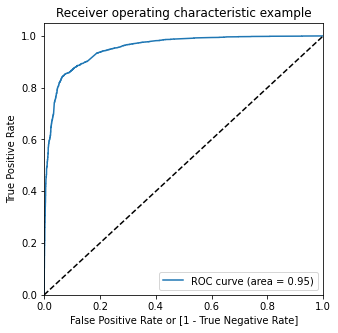

In [1261]:
draw_roc(prediction_table.y_train, prediction_table.prob)

### Step 10: Finding Optimal Cutoff Point

In [1262]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    prediction_table[i]= prediction_table.prob.map(lambda x: 1 if x > i else 0)
prediction_table.head()

,y_train,prob,predection,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,-0.050187,0,0,0,0,0,0,0,0,0,0,0
6795,0,0.432744,0,1,1,1,1,1,0,0,0,0,0
3516,0,-0.011381,0,0,0,0,0,0,0,0,0,0,0
8105,0,0.372147,0,1,1,1,1,0,0,0,0,0,0
3934,0,0.201105,0,1,1,1,0,0,0,0,0,0,0


In [1263]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(prediction_table.y_train, prediction_table[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.551330  0.997161  0.276612
0.1   0.1  0.609462  0.994323  0.372314
0.2   0.2  0.747681  0.981346  0.603698
0.3   0.3  0.810297  0.961882  0.716892
0.4   0.4  0.870284  0.900243  0.851824
0.5   0.5  0.899814  0.839822  0.936782
0.6   0.6  0.864873  0.700324  0.966267
0.7   0.7  0.819728  0.550689  0.985507
0.8   0.8  0.778139  0.427413  0.994253
0.9   0.9  0.713513  0.252230  0.997751


<Figure size 720x576 with 0 Axes>

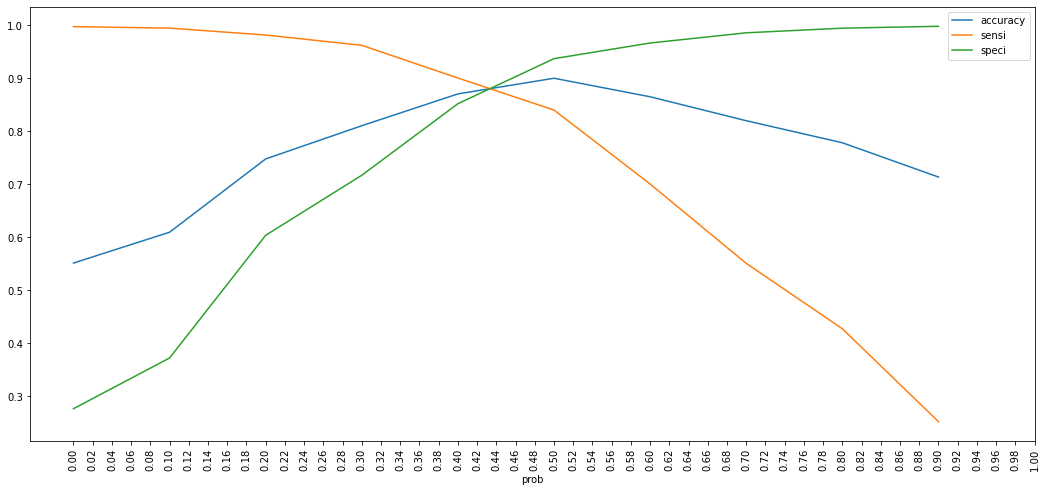

In [1264]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=[10,8])
# sns.lineplot(data=cutoff_df, x='prob', y=['accuracy','sensi','speci'])
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize = (18,8))
plt.xticks(np.arange(0.0,1.02, 0.02), rotation=90)
plt.show()

In [1265]:
# looks like converges at 0.44 (optimal point)

prediction_table["final_predection"] = prediction_table.prob.map(lambda x : 1 if x > 0.44 else 0)
prediction_table

,y_train,prob,predection,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predection
1871,0,-0.050187,0,0,0,0,0,0,0,0,0,0,0,0
6795,0,0.432744,0,1,1,1,1,1,0,0,0,0,0,0
3516,0,-0.011381,0,0,0,0,0,0,0,0,0,0,0,0
8105,0,0.372147,0,1,1,1,1,0,0,0,0,0,0,0
3934,0,0.201105,0,1,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,1,0.697197,1,1,1,1,1,1,1,1,0,0,0,1
79,1,0.874136,1,1,1,1,1,1,1,1,1,1,0,1
8039,1,0.394331,0,1,1,1,1,0,0,0,0,0,0,0
6936,0,0.012557,0,1,0,0,0,0,0,0,0,0,0,0


In [1266]:
metrics.accuracy_score(prediction_table.y_train, prediction_table.final_predection)

0.8879097093382807

In [1267]:
confusion = metrics.confusion_matrix(prediction_table.y_train, prediction_table.final_predection)
confusion

array([[3592,  410],
       [ 315, 2151]])

In [1268]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1269]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8722627737226277

In [1270]:
# Let us calculate specificity
TN / float(TN+FP)

0.8975512243878061

In [1271]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.1024487756121939


In [1272]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8399062866067942


In [1273]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9193754799078577


In [1274]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8399062866067942

In [1275]:
#recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8722627737226277

### Precision and Recall trade off

In [1276]:
from sklearn.metrics import precision_recall_curve

In [1284]:
p, r, thresholds = precision_recall_curve(prediction_table.y_train, prediction_table.prob)

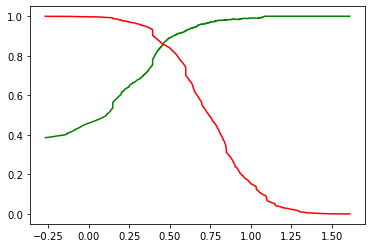

In [1289]:
# plt.figure(figsize=[18,8])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
#plt.xticks(np.arange(0.0,1.02, 0.02), rotation=90)
plt.show()

### Testing the model on test data

In [1277]:
x_test[minMax_cols] = scaler.transform(x_test[minMax_cols])

In [1278]:
y_test_predict = final_log_model.predict(sm.add_constant(x_test[cols]))

In [1279]:
test_DF = pd.DataFrame({"y_test":y_test, "prop":y_test_predict})
test_DF.head()

,y_test,prop
4269,1,0.821063
2376,1,0.901913
7766,1,0.629005
9199,0,-0.134105
4359,1,0.644776


In [1280]:
test_DF['final_pred'] = test_DF.prop.map(lambda x: 1 if x > 0.44 else 0)
test_DF

,y_test,prop,final_pred
4269,1,0.821063,1
2376,1,0.901913,1
7766,1,0.629005,1
9199,0,-0.134105,0
4359,1,0.644776,1
...,...,...,...
8649,0,0.215341,0
2152,1,0.849491,1
7101,0,0.111469,0
5331,0,0.412983,0


In [1281]:
metrics.accuracy_score(test_DF.y_test, test_DF.final_pred)

0.8867243867243867

In [1282]:
confusion_test = metrics.confusion_matrix(test_DF.y_test, test_DF.final_pred)
confusion_test

array([[1499,  178],
       [ 136,  959]])

In [1283]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('sensitivity',TP / float(TP+FN))


# Let us calculate specificity
print('specificity', TN / float(TN+FP))

# Calculate false postive rate 
print('false postive rate' ,FP/ float(TN+FP))

# Positive predictive value 
print ('Positive predictive value ',TP / float(TP+FP))

# Negative predictive value
print ('Negative predictive value',TN / float(TN+ FN))

# Precision
print('Precision',confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1]))

#recall
print('recall',confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1]))

sensitivity 0.8757990867579909
specificity 0.8938580799045915
false postive rate 0.10614192009540847
Positive predictive value  0.8434476693051891
Negative predictive value 0.9168195718654434
Precision 0.8434476693051891
recall 0.8757990867579909
